In [26]:
#Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

**EXPLORATION  DU DATASET **

In Hospital Mortality Prediction
The predictors of in-hospital mortality for intensive care units (ICU)-admitted HF patients remain poorly characterized. We aimed to develop and validate a prediction model for all-cause in-hospital mortality among ICU-admitted HF patients.
Notre objectif était de développer et de valider un modèle de prédiction de la mortalité hospitalière toutes causes confondues chez les patients atteints d'insuffisance cardiaque admis en unité de soin intensif.

In [27]:
#Lecture du dataset
df=pd.read_csv('data01.csv')
print(df.head(5))
print(df.shape)

   group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.1625

In [4]:
#Présentation de certaines variables
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

Explication des variables en initiales :   

outcome = variable cible (0 = Vivant et 1 = mort)

CHD with no MI :Coronary Heart Disease with no Myocardial Infarction

COPD : chronic obstructive pulmonary disease

SP O2: saturation pulse oxygen

RBC : red blood cells

MCH : mean corpuscular hemoglobin

MCHC : mean corpuscular hemoglobin concentration

MCV : Mean Corpuscular Volume

RDW : red blood cell distribution width

PT : prothrombin time

PH : hydrogen ion concentration

PCO2 :partial pressure of CO2 in arterial blood

EF : LVEF pour Left Ventricular Ejection Fraction

In [5]:
#Duplicatas et Données manquantes
print(df.duplicated().sum())
print(df.isna().sum())
#Il n'y pas de données en double. Présence de quelques colonnes avec des données manquantes .

0
group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basoph

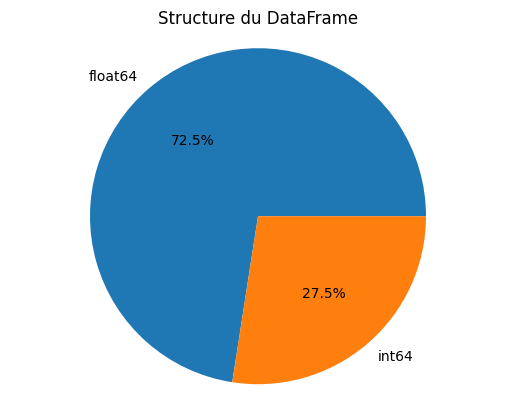

In [ ]:
#types de données
data_types = df.dtypes
type_counts = data_types.value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Structure du DataFrame')
plt.axis('equal')  # Pour avoir un camembert parfait
plt.show()

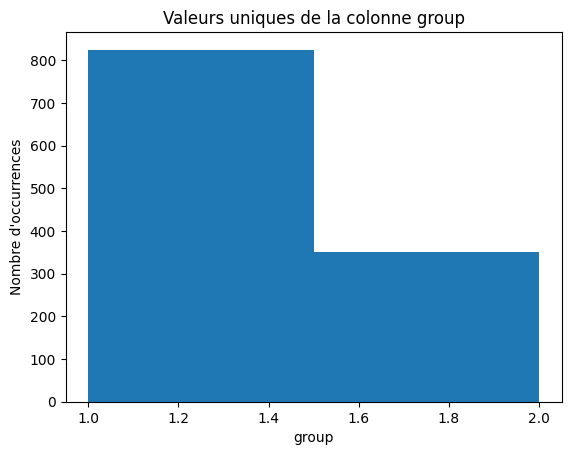

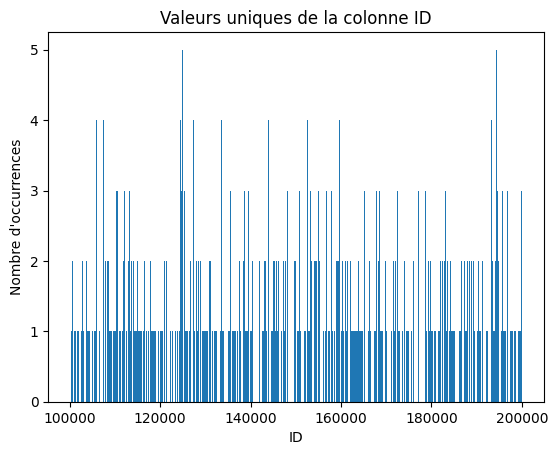

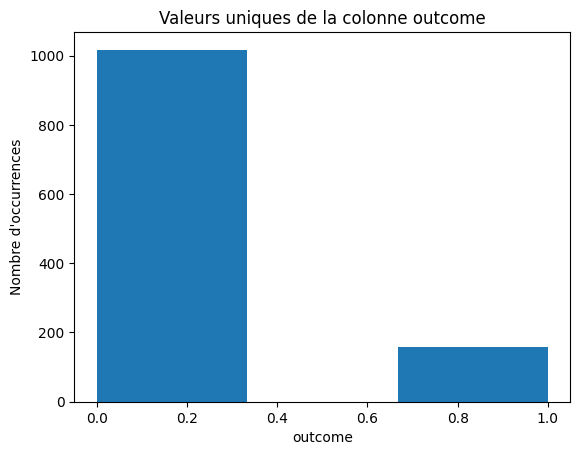

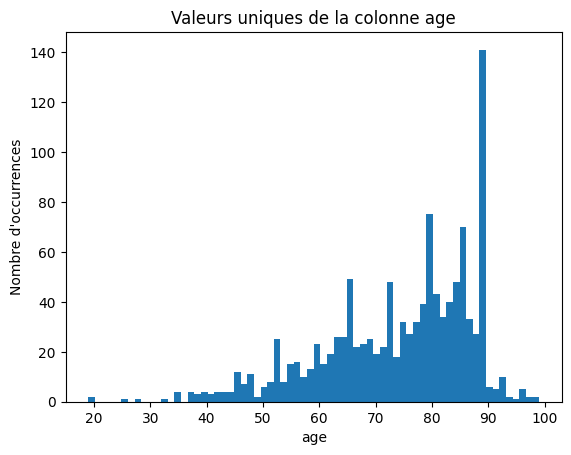

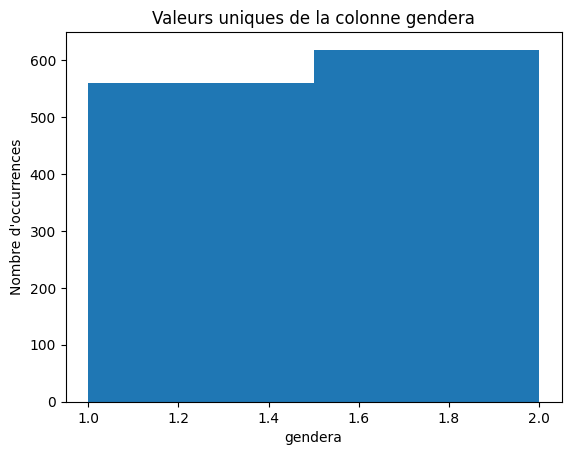

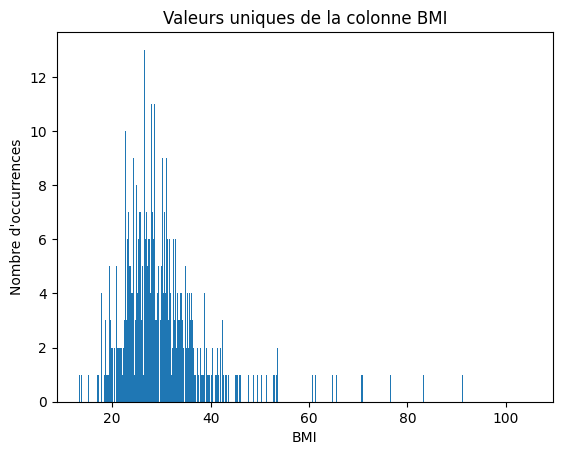

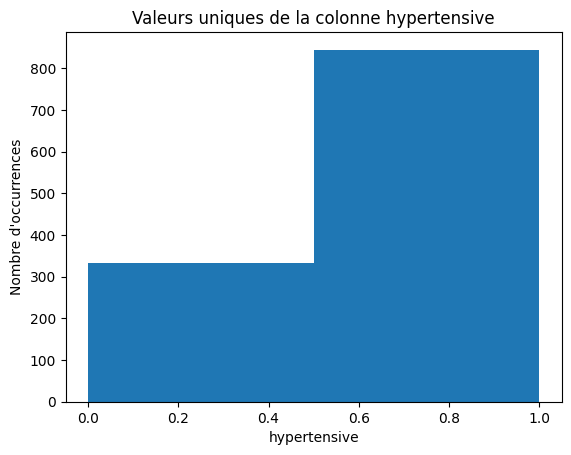

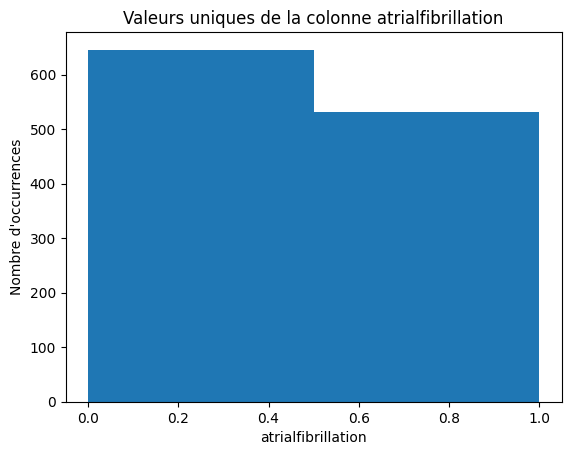

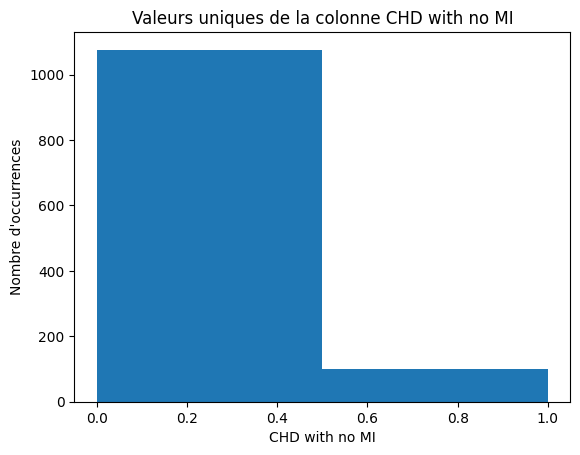

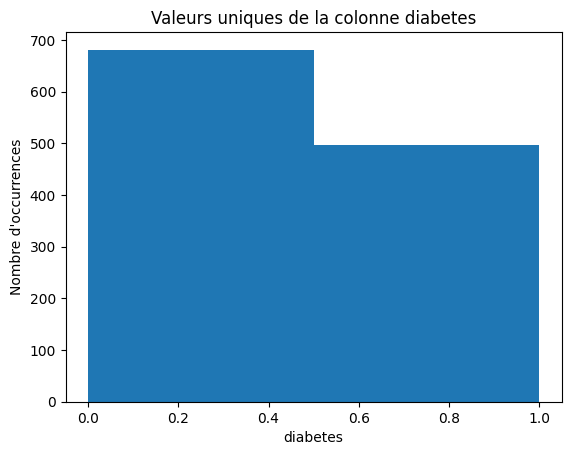

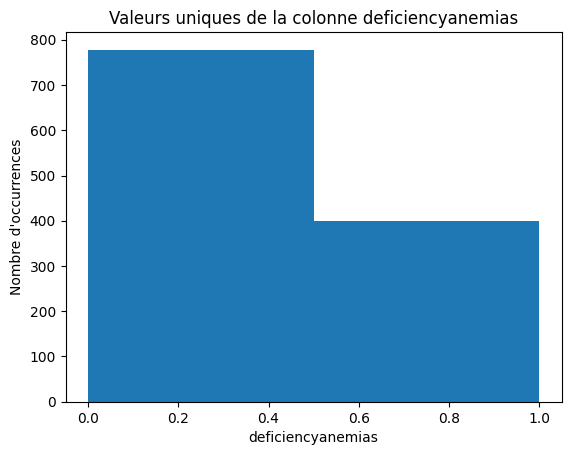

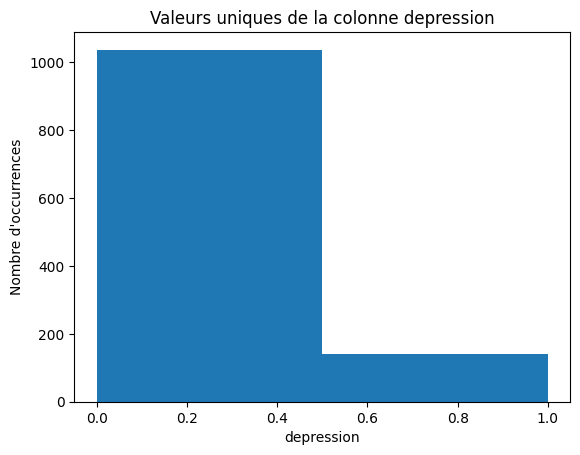

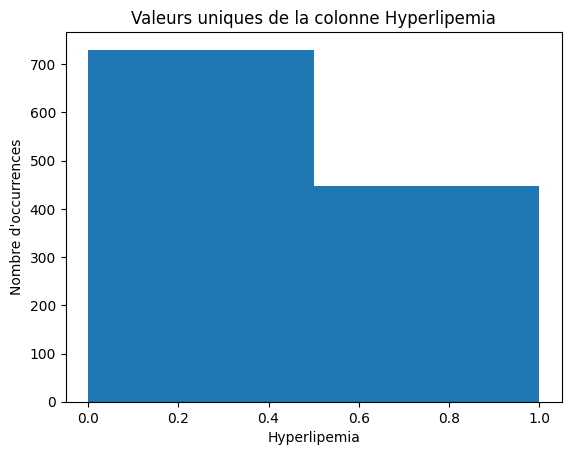

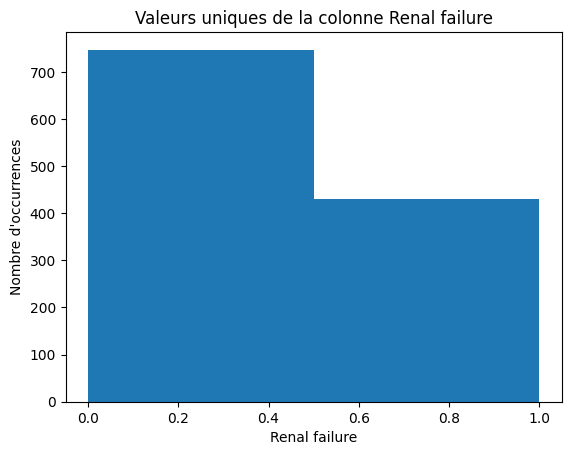

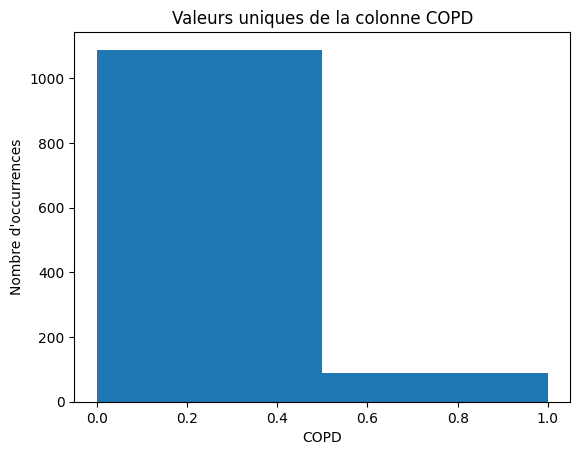

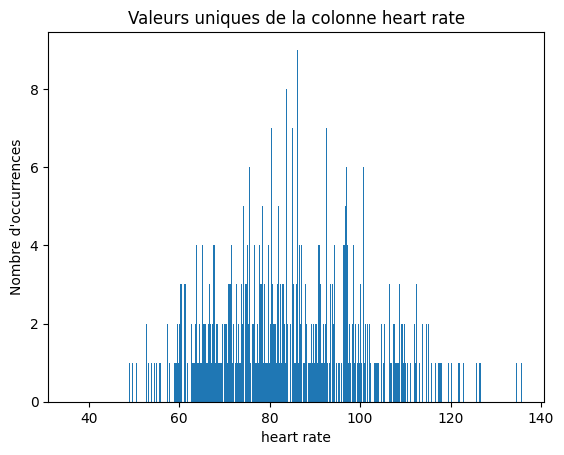

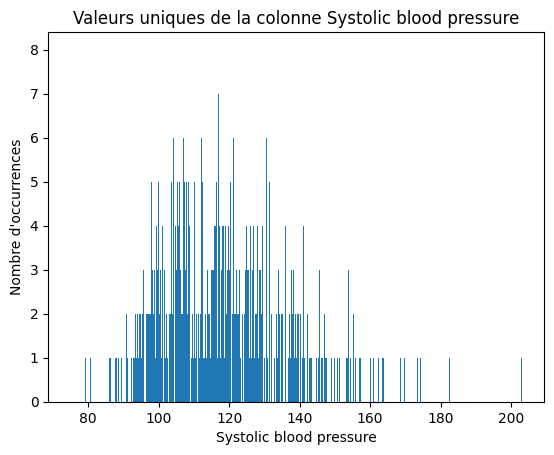

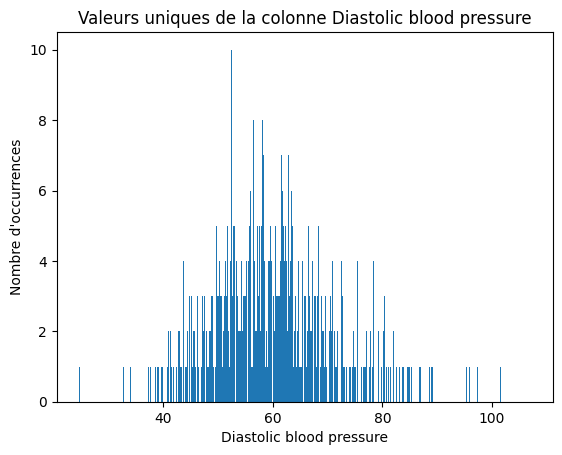

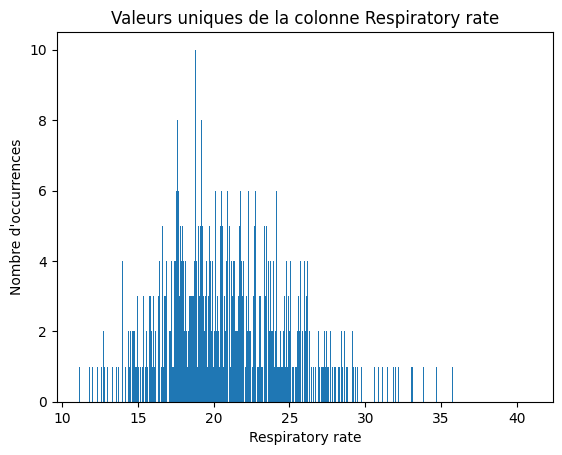

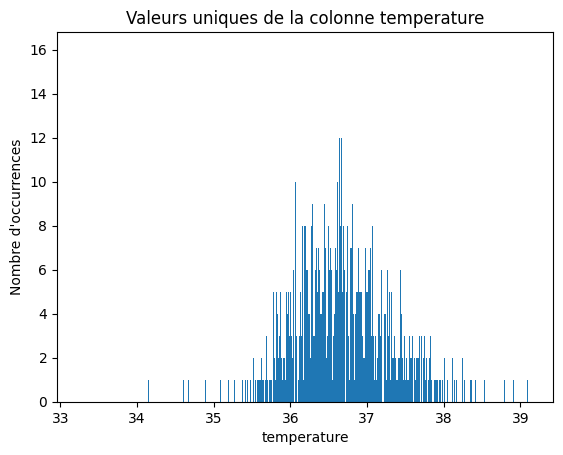

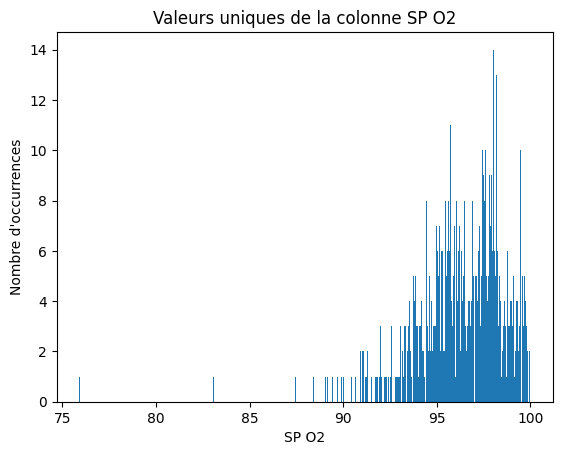

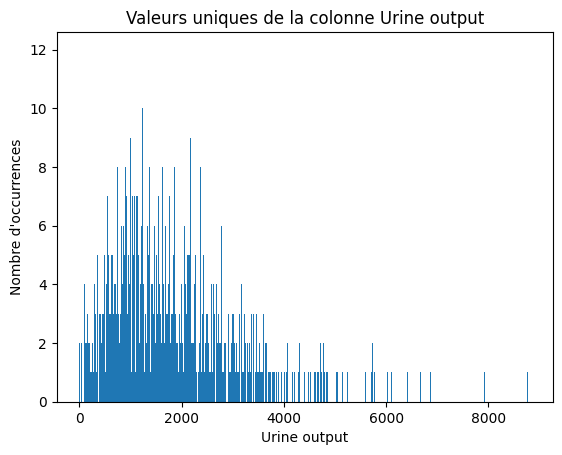

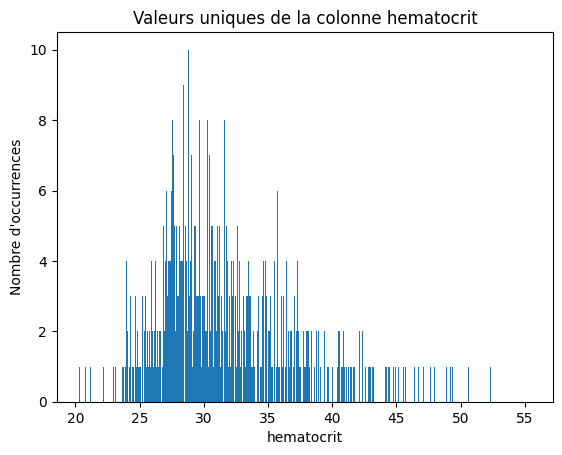

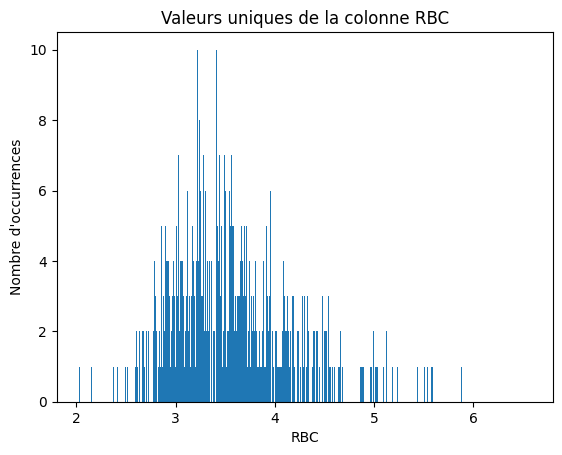

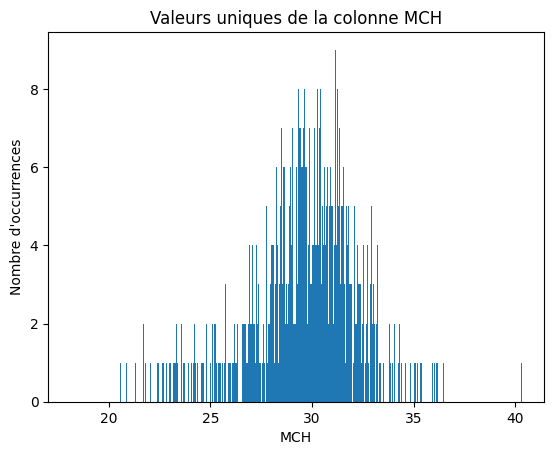

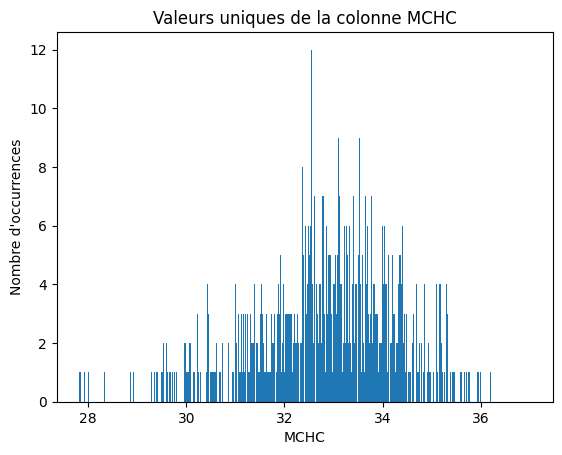

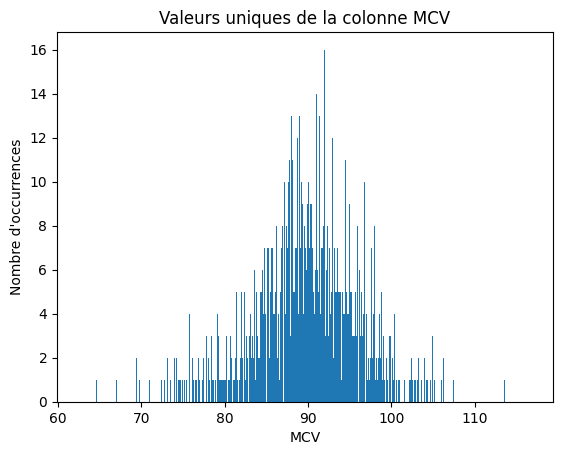

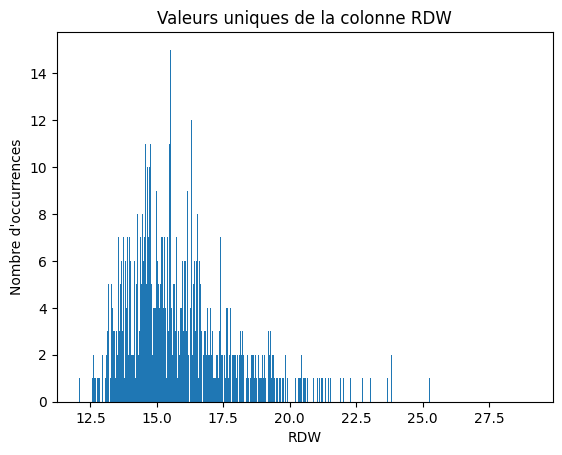

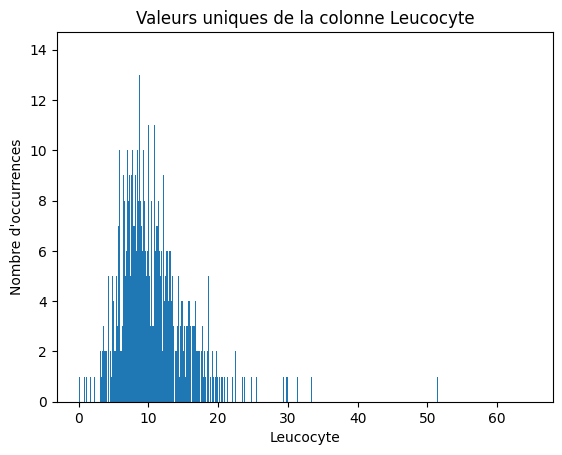

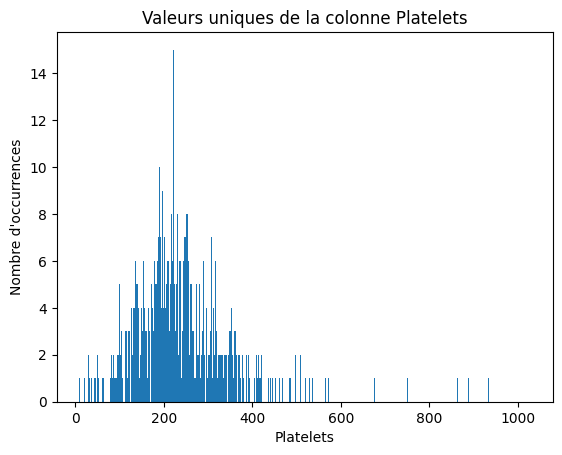

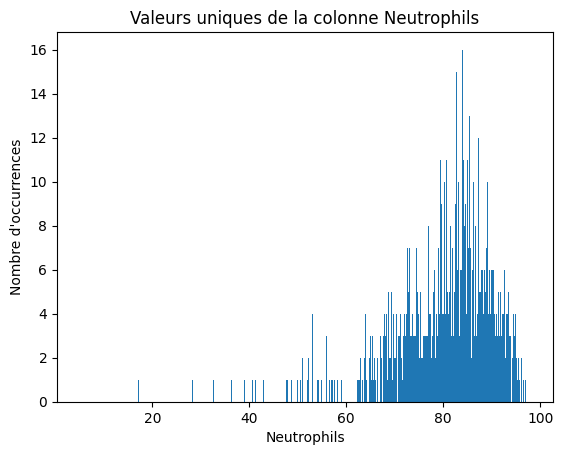

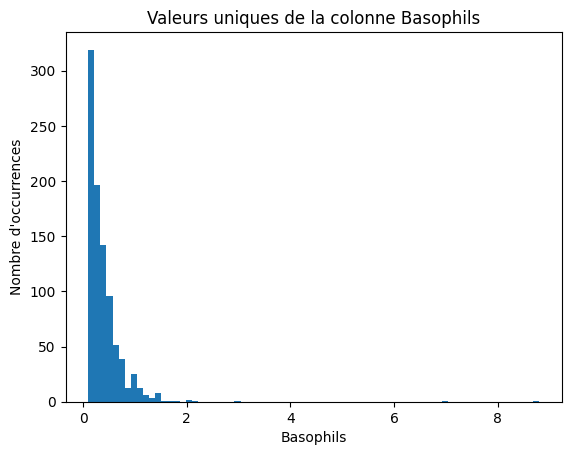

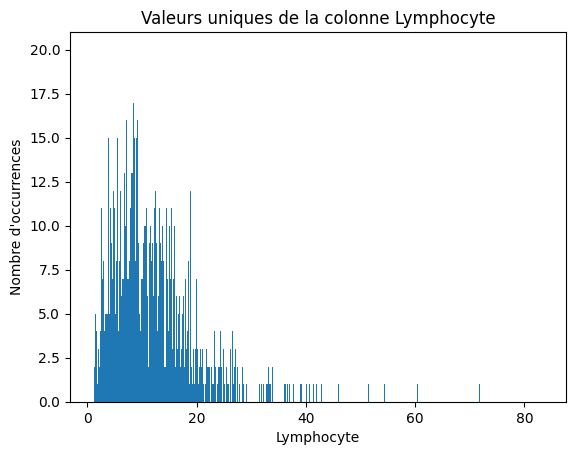

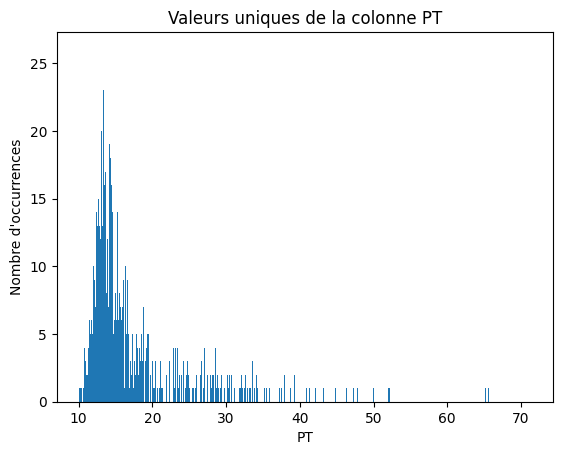

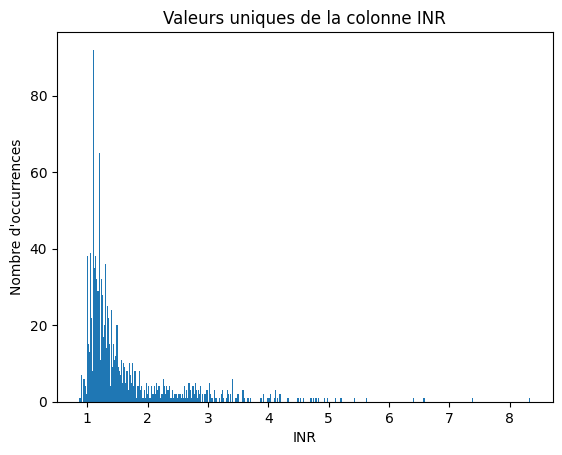

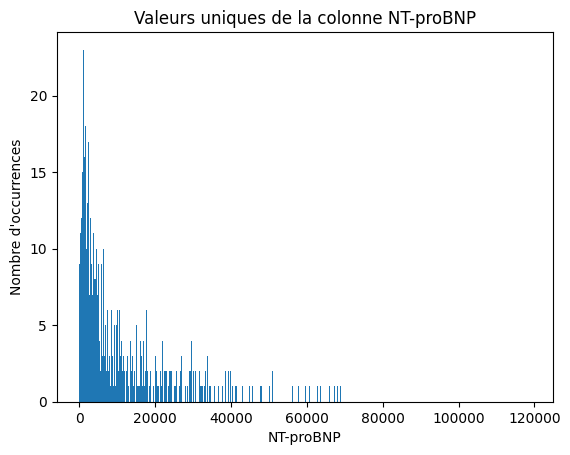

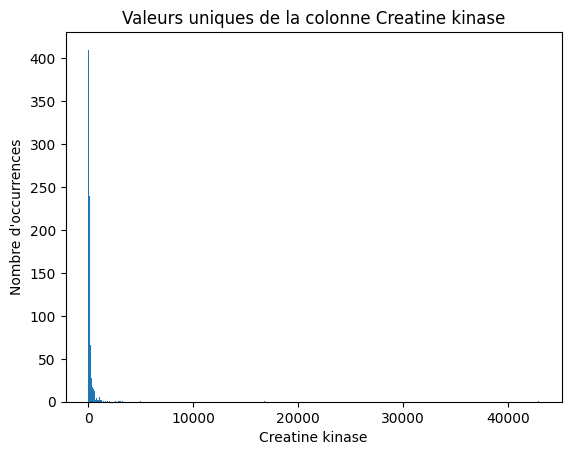

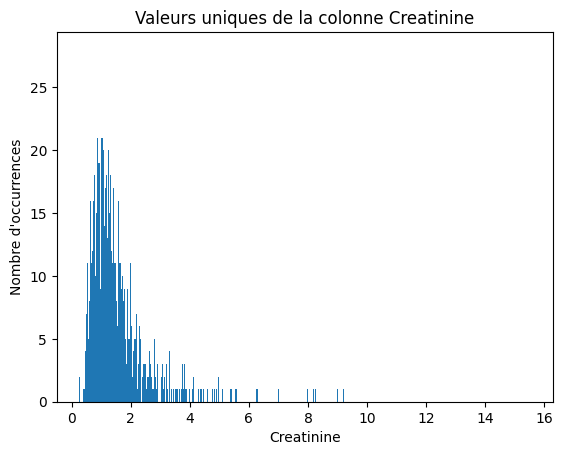

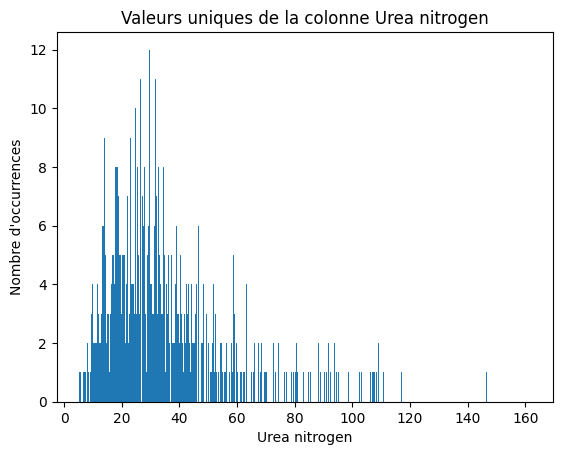

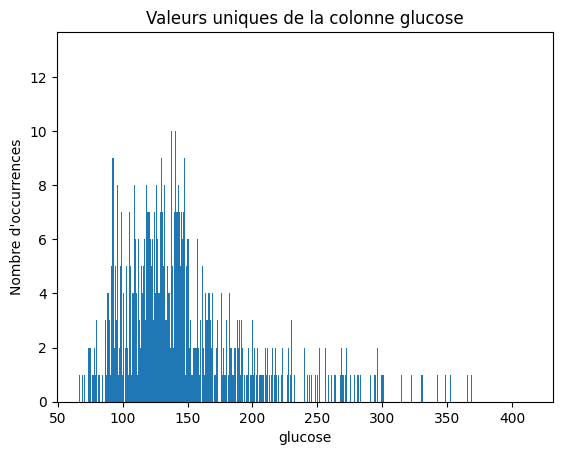

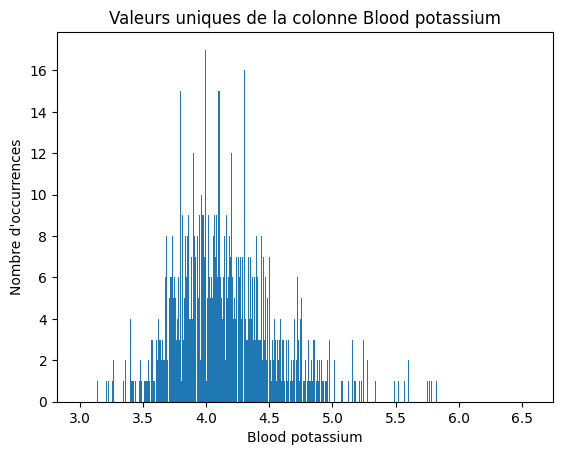

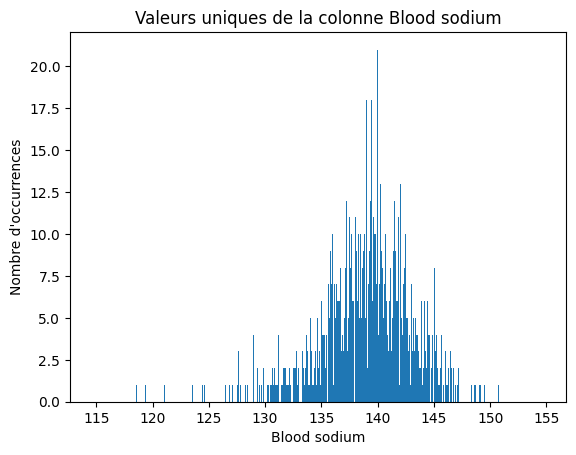

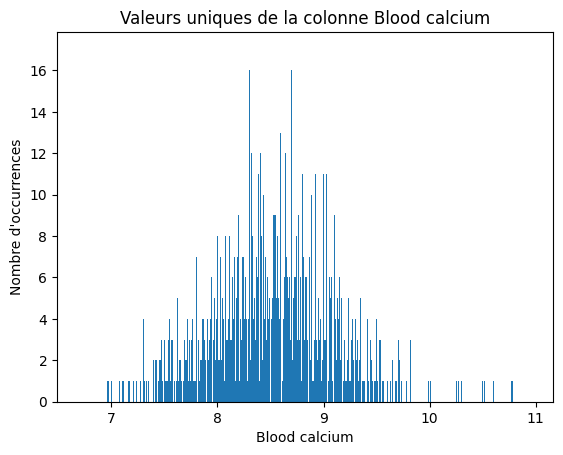

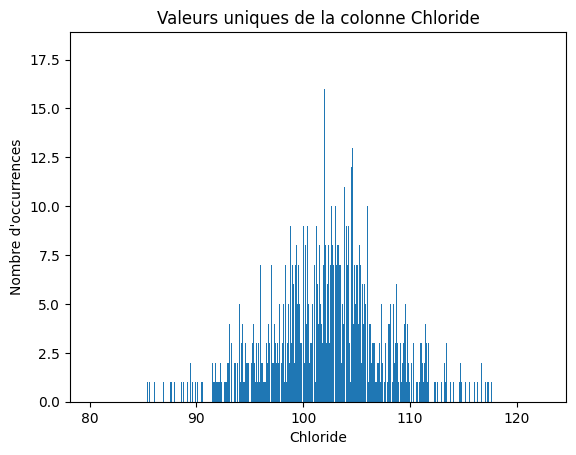

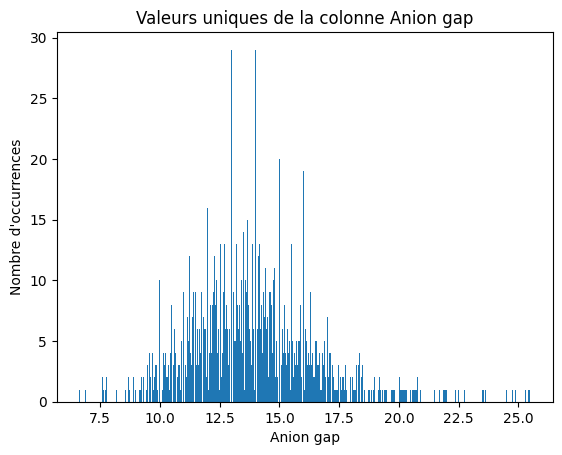

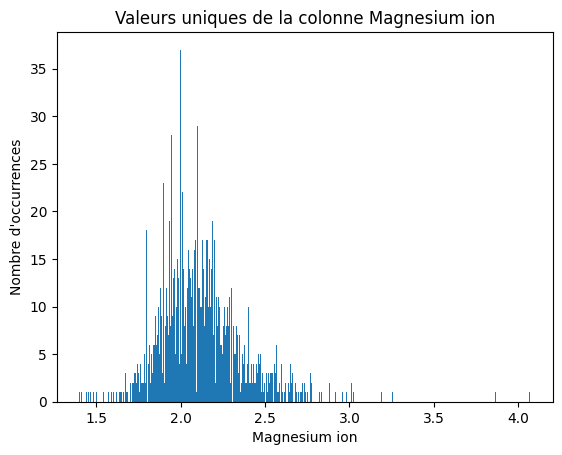

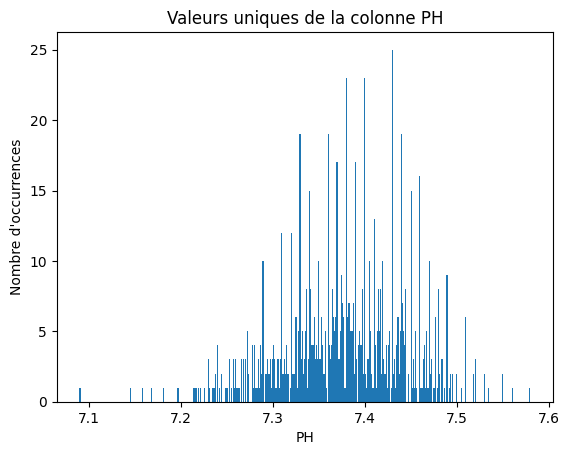

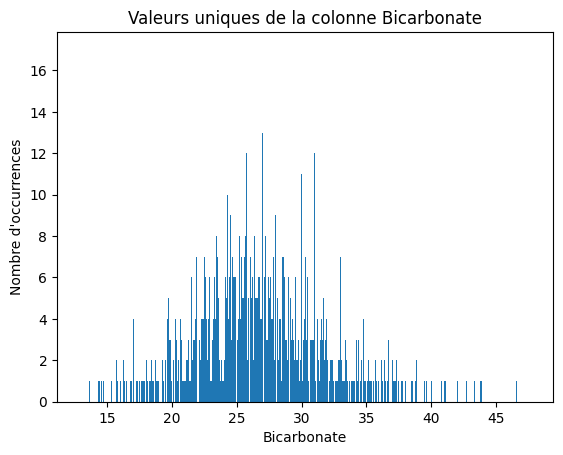

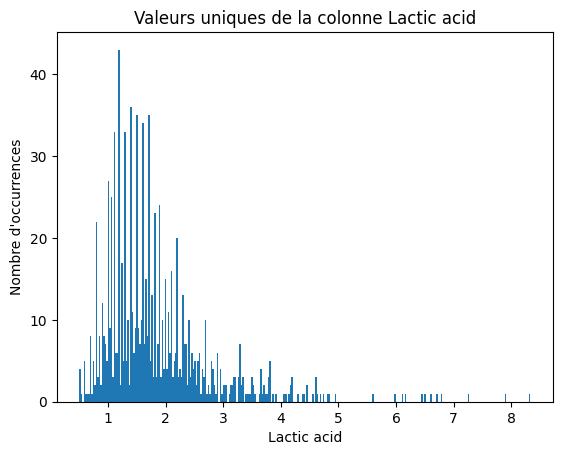

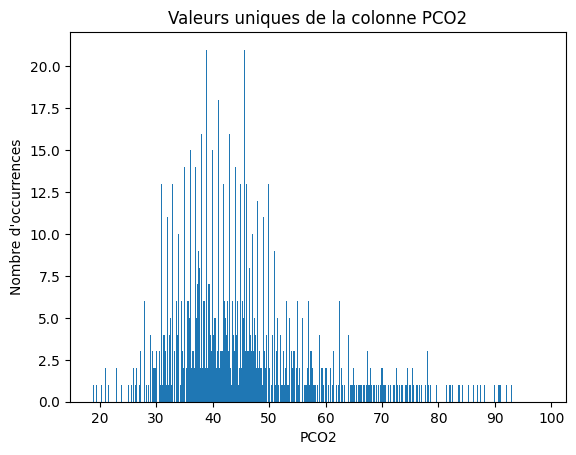

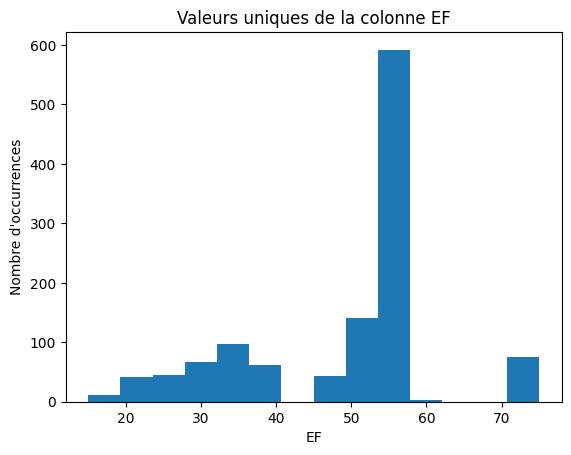

In [ ]:
# Pour distinguer les colonnes de variables catégorielles et celles numérique :  un histogramme pour représenter les valeurs uniques
for column in df.columns:
    unique_values = df[column].unique()
    plt.hist(df[column], bins=len(unique_values))
    plt.xlabel(column)
    plt.ylabel('Nombre d\'occurrences')
    plt.title('Valeurs uniques de la colonne {}'.format(column))
    plt.show()
    #On remarque que les valeurs manquantes se retrouvent dans les variables numériques. Je décide d'une stratégie pour imputer les valeurs manquantes des variables numériques

In [28]:
#Gestion des valeurs manquantes :
#suppression de la valeur manquante dans outcome (variable cible, catégorielle ):
df = df.dropna(subset=['outcome'])

#Remplacement des valeurs manquantes des colonnes numériques par leur moyenne :
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
imputer = SimpleImputer(strategy='mean')
for column in columns_with_missing_values:
    df[column] = imputer.fit_transform(df[[column]])


<ipython-input-28-d8a346a03c40>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = imputer.fit_transform(df[[column]])
<ipython-input-28-d8a346a03c40>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = imputer.fit_transform(df[[column]])
<ipython-input-28-d8a346a03c40>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [9]:
#Vérification des valeurs manquantes:
df.isna().sum().sum()

0

Quelques Visualisations :

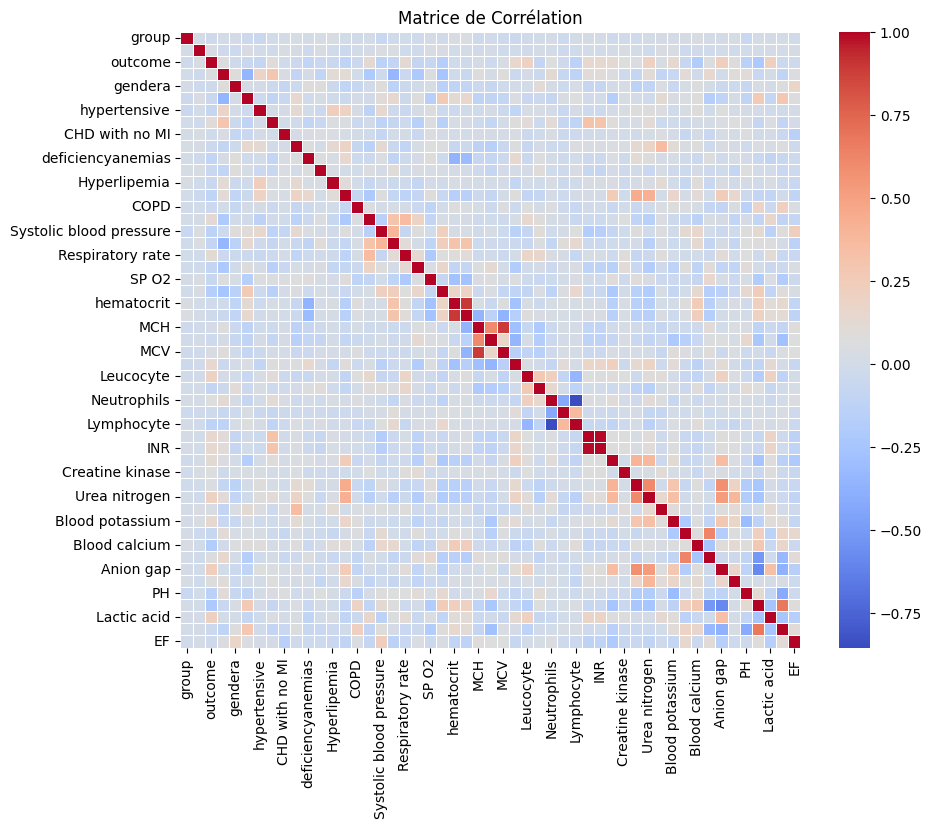

In [11]:
#Mettre en évidence l'existance d'une corrélation entre les variables :
matrix_correlation=df. corr()
plt.figure(figsize=(10,8))
sns.heatmap(matrix_correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

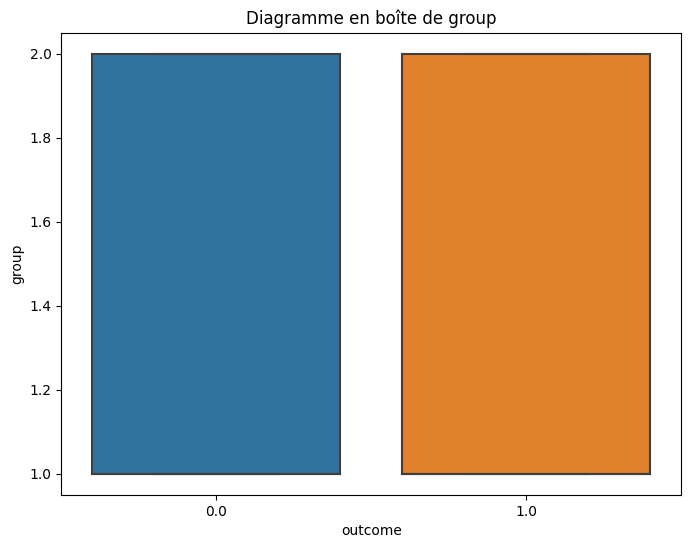

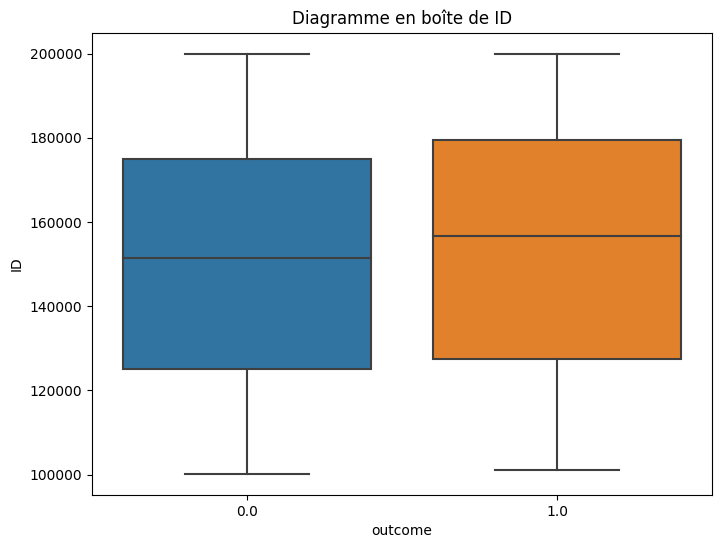

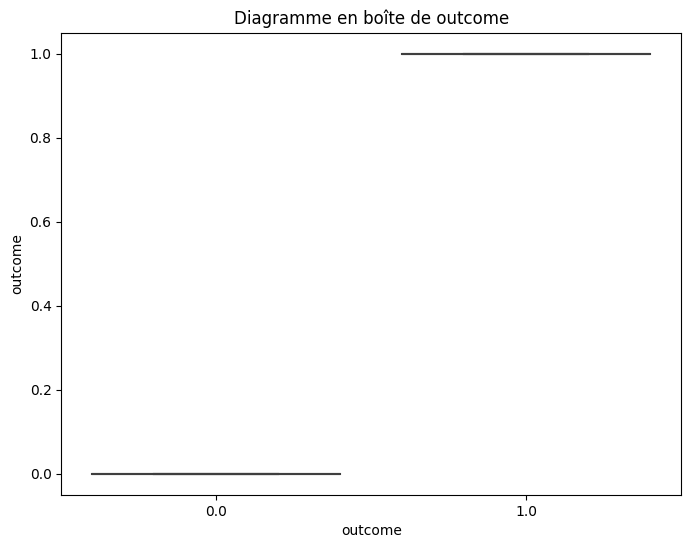

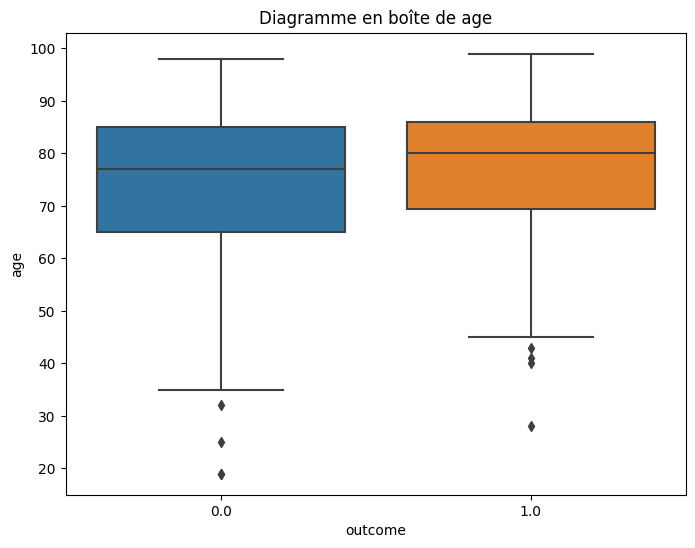

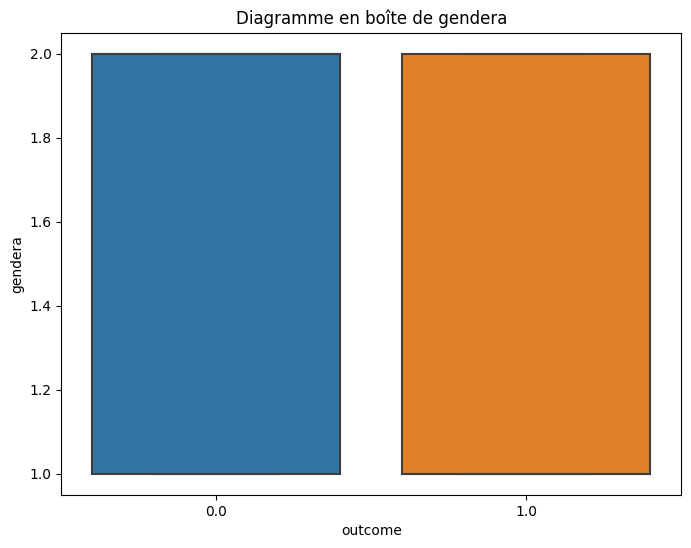

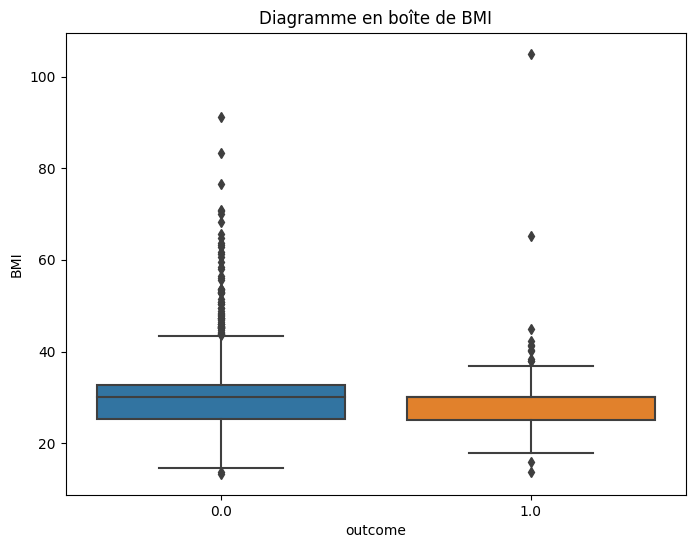

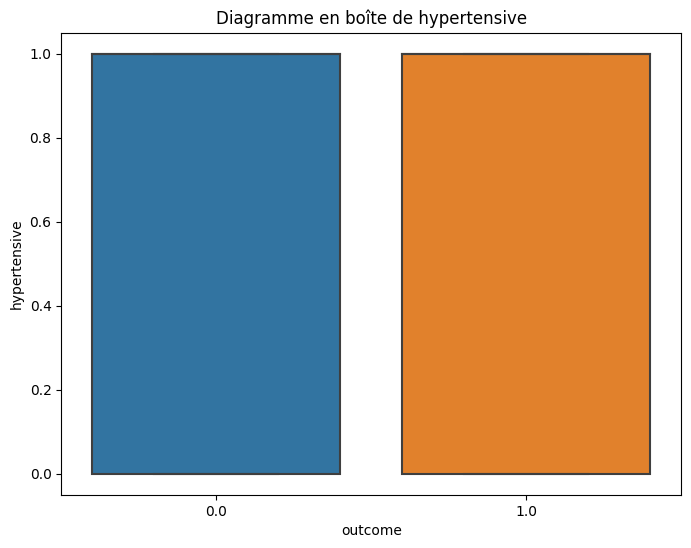

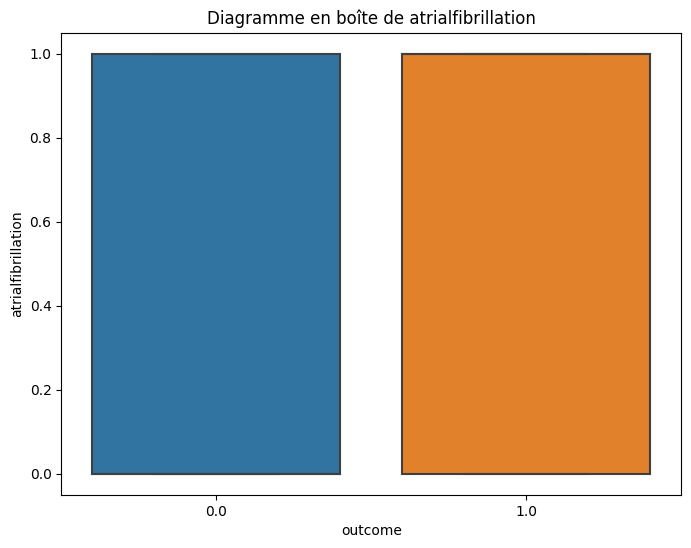

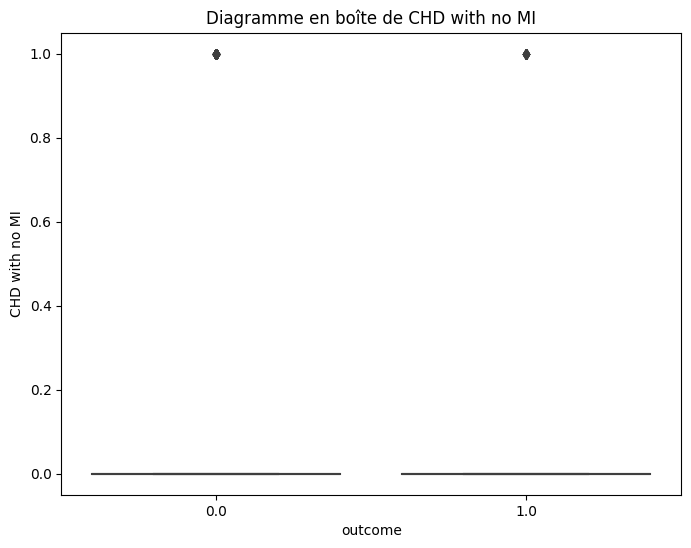

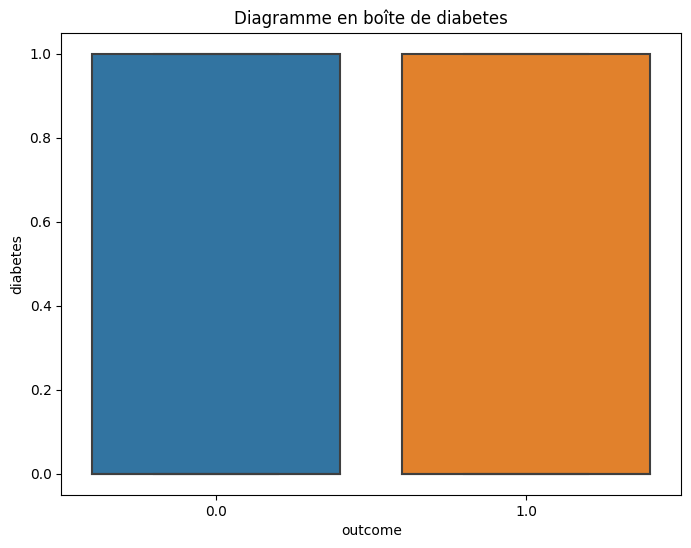

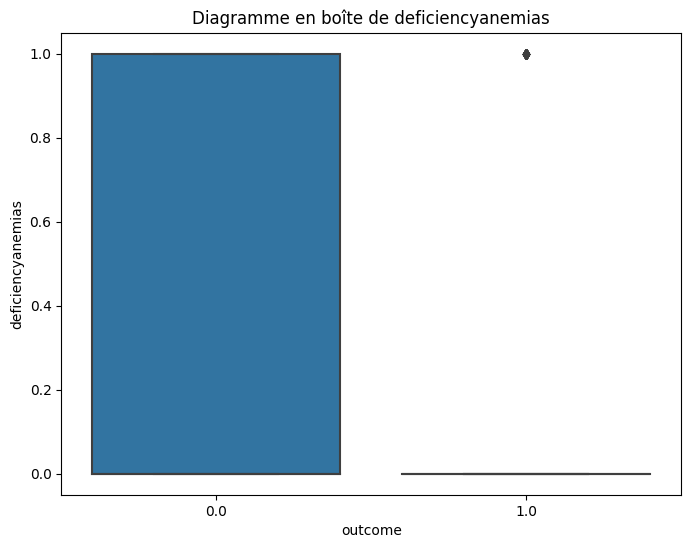

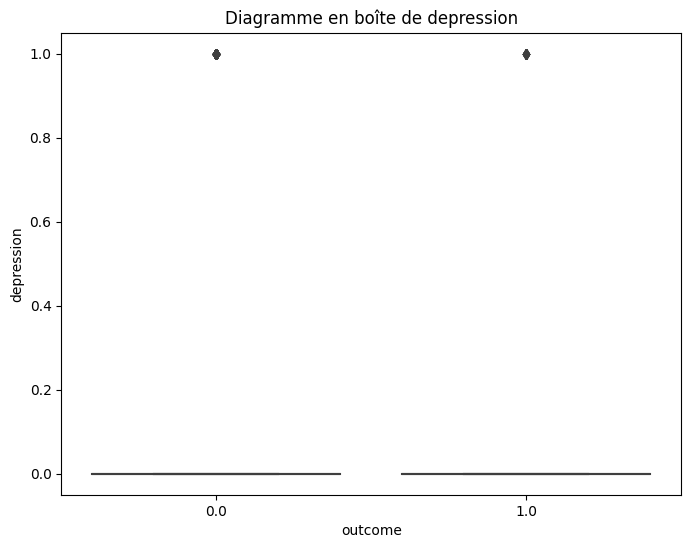

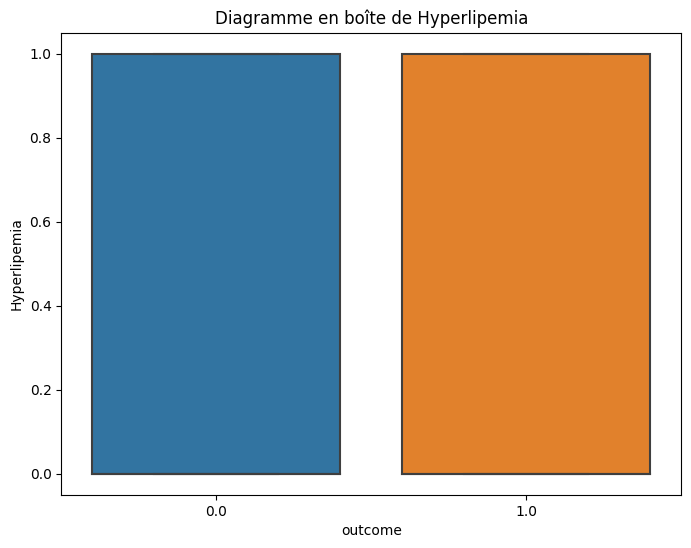

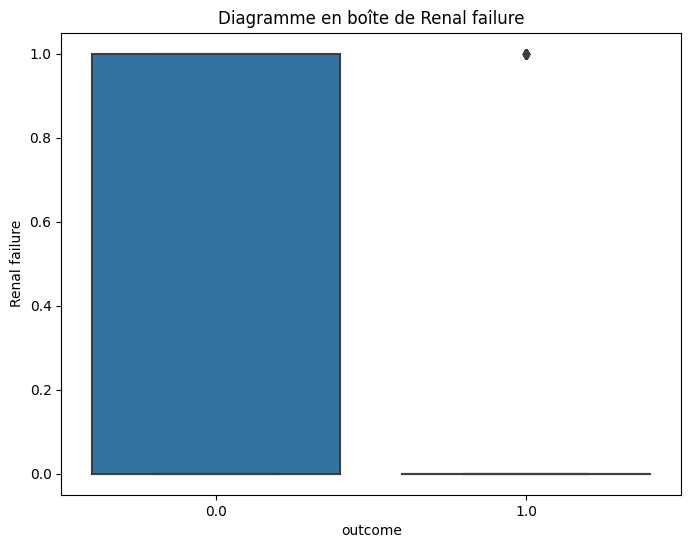

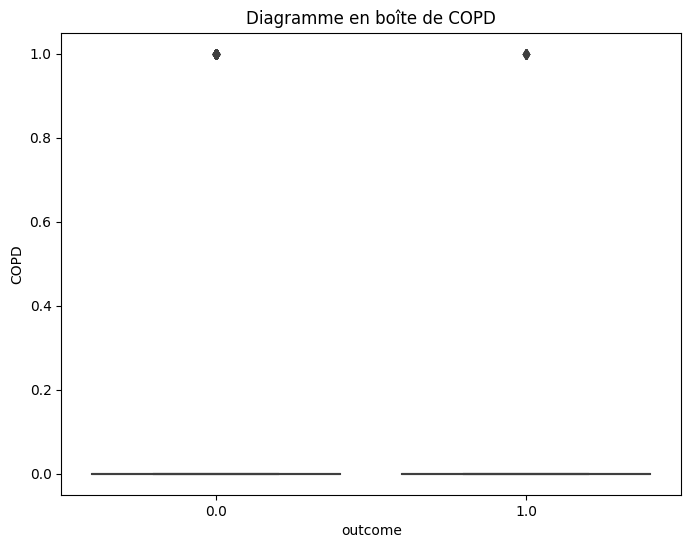

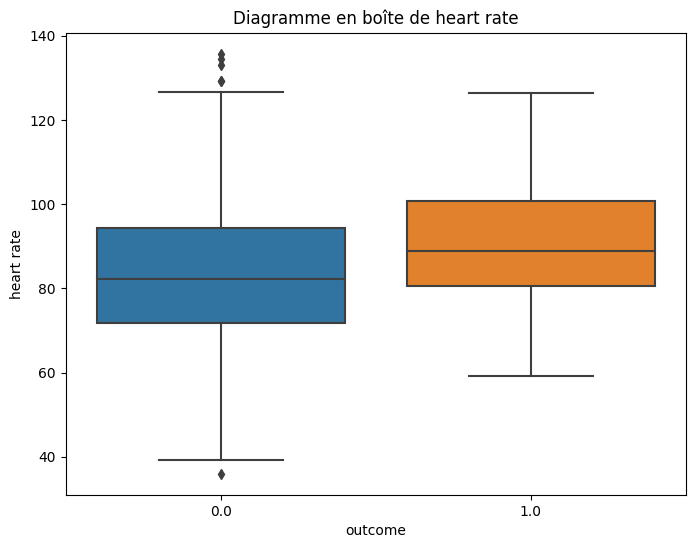

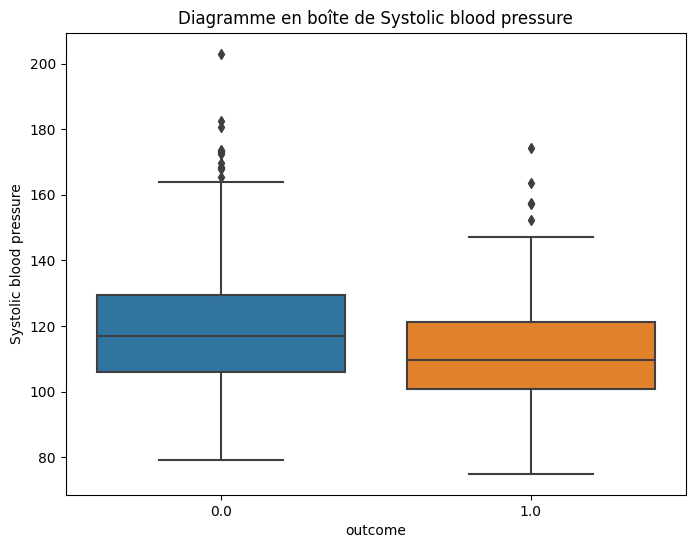

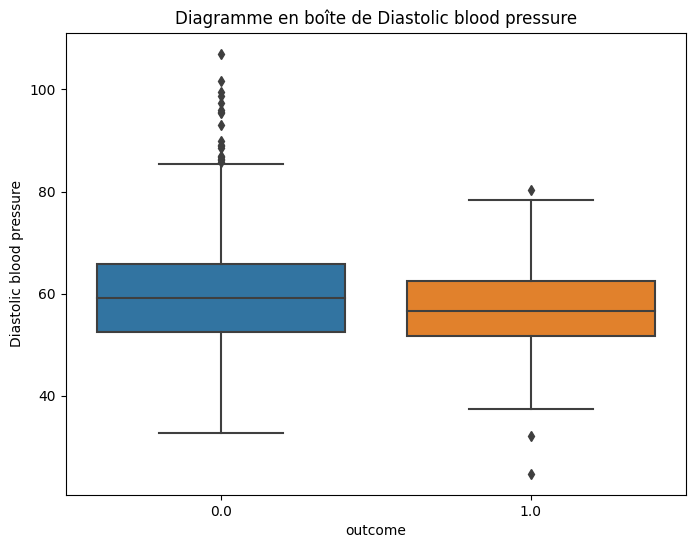

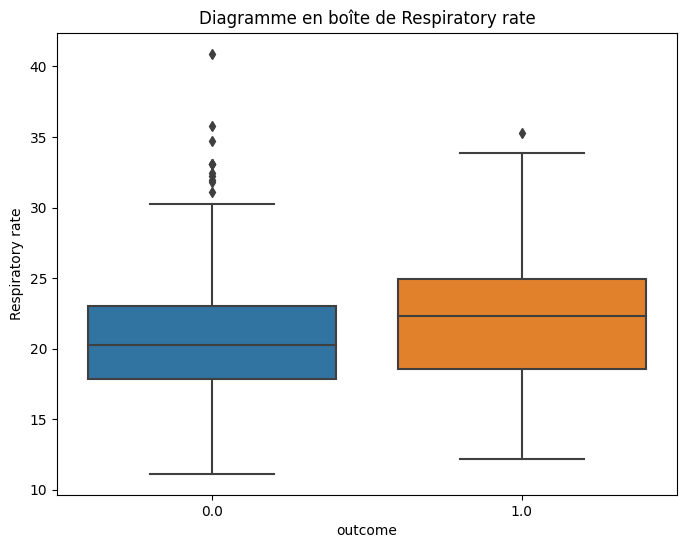

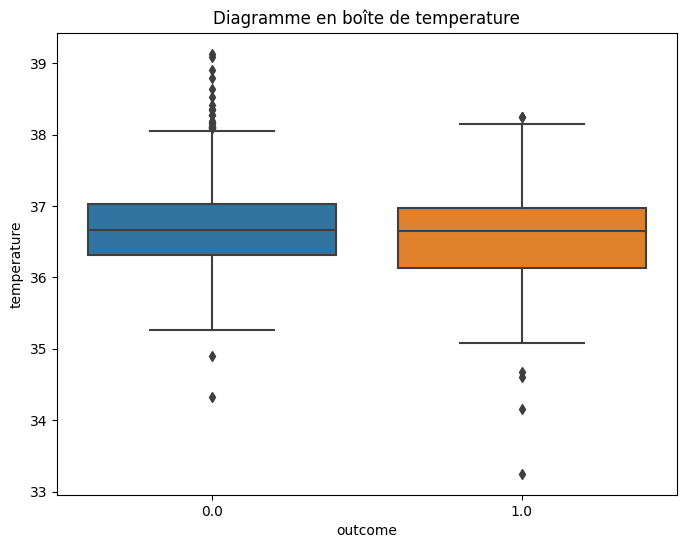

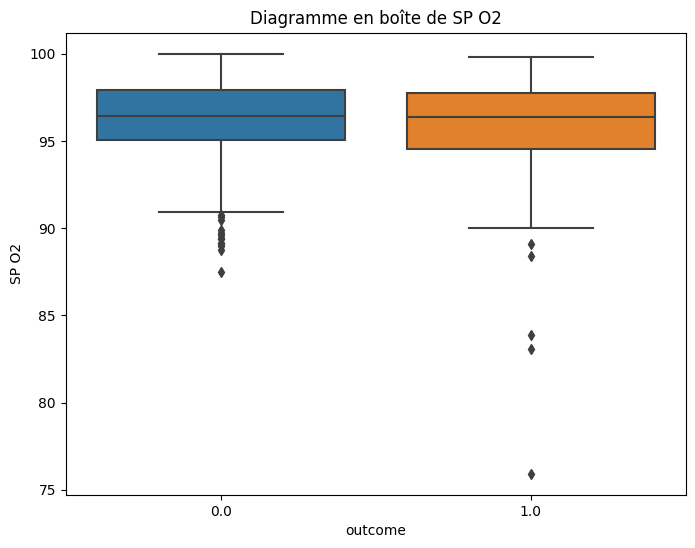

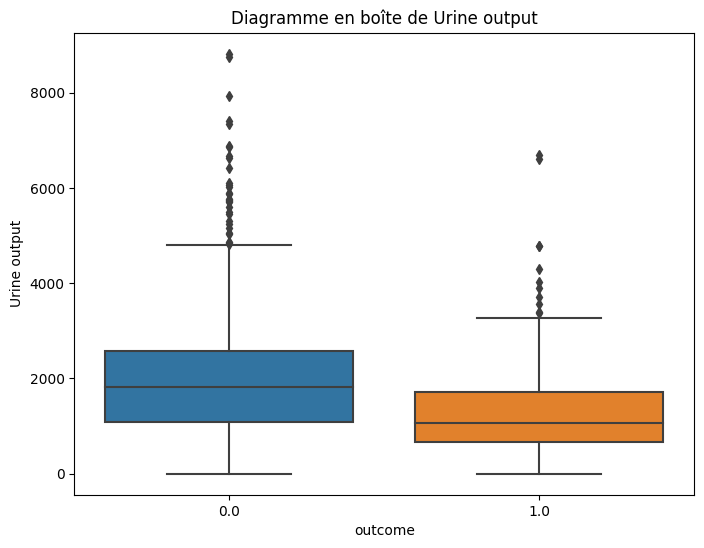

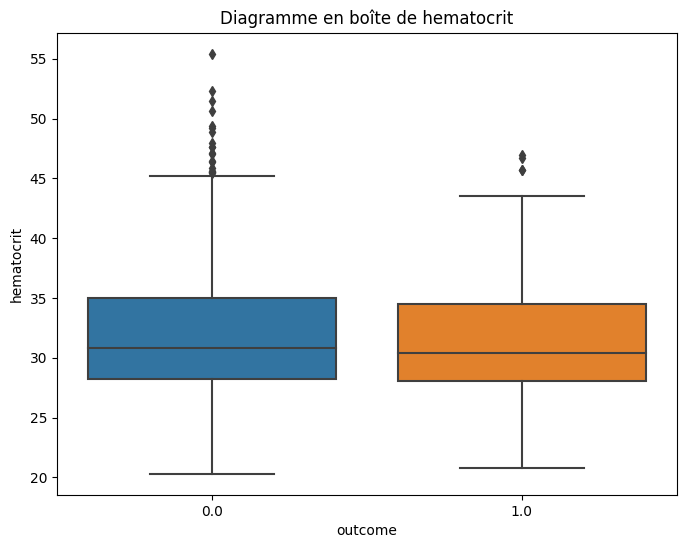

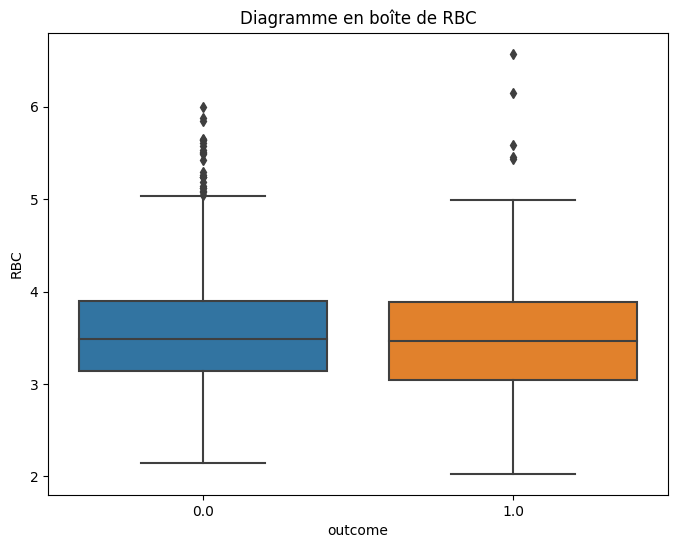

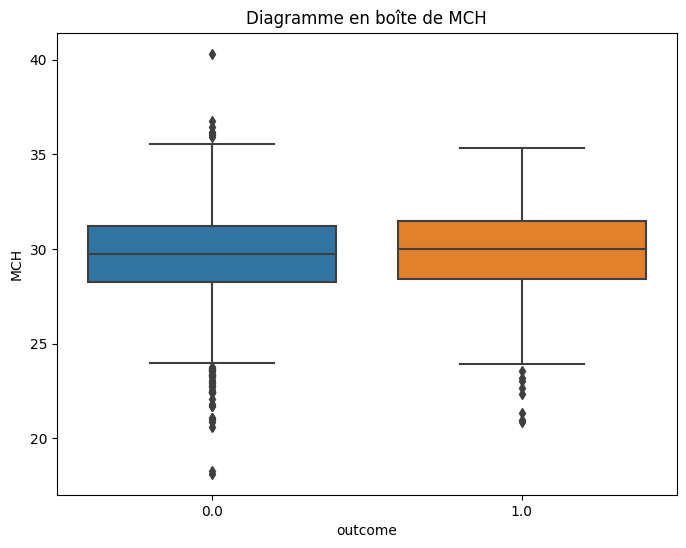

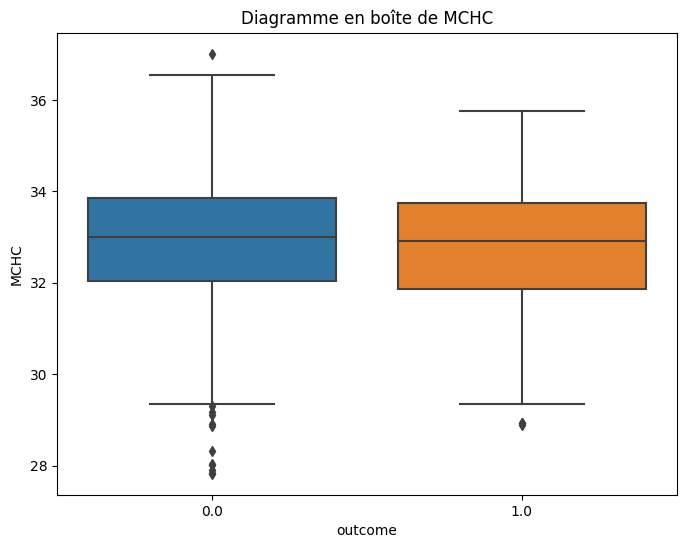

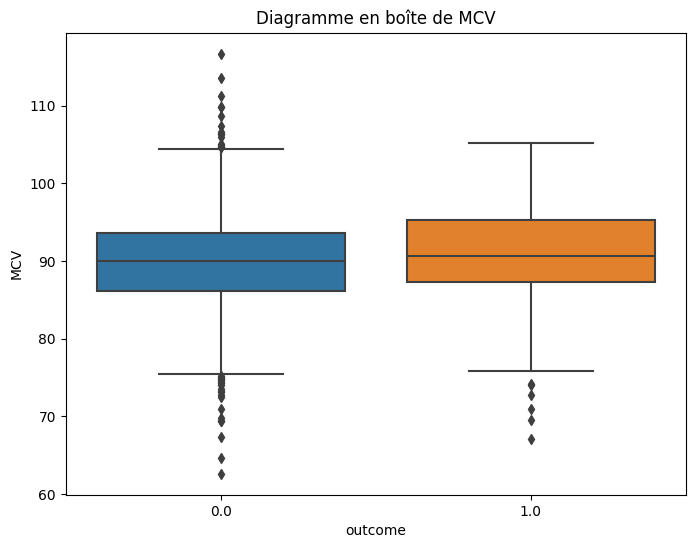

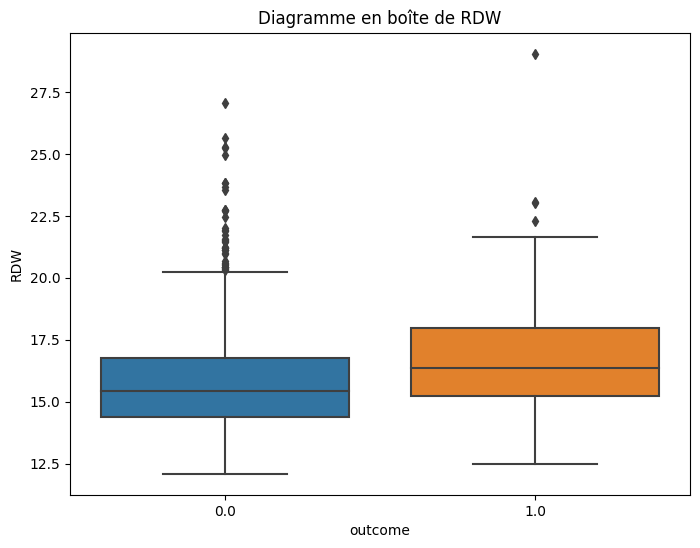

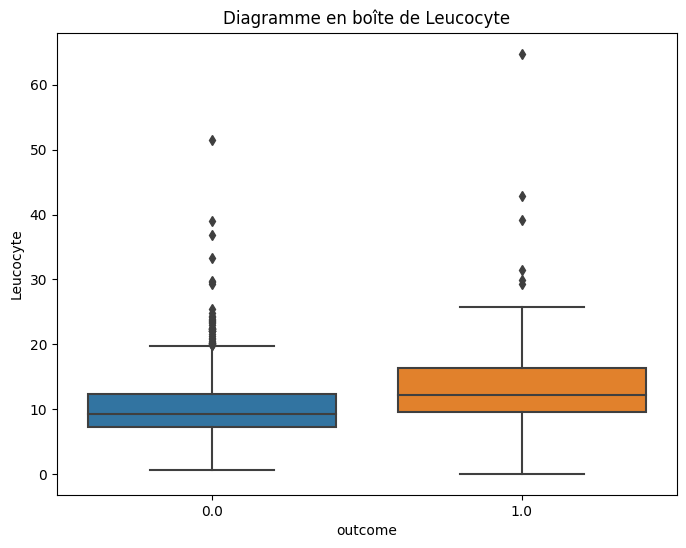

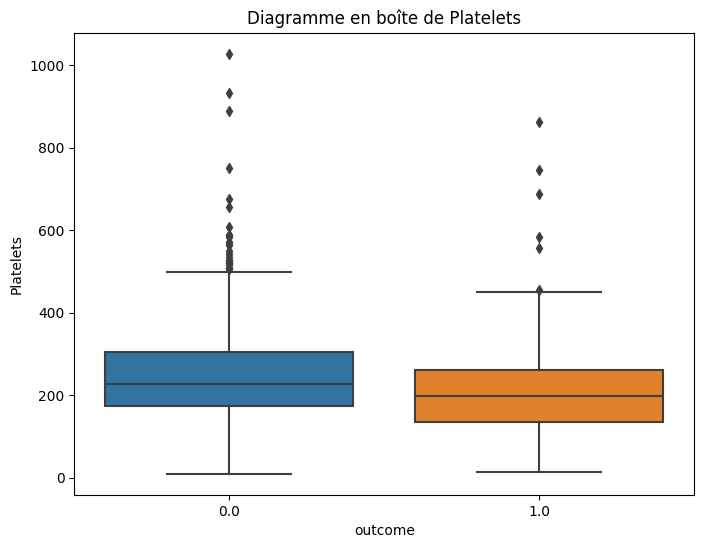

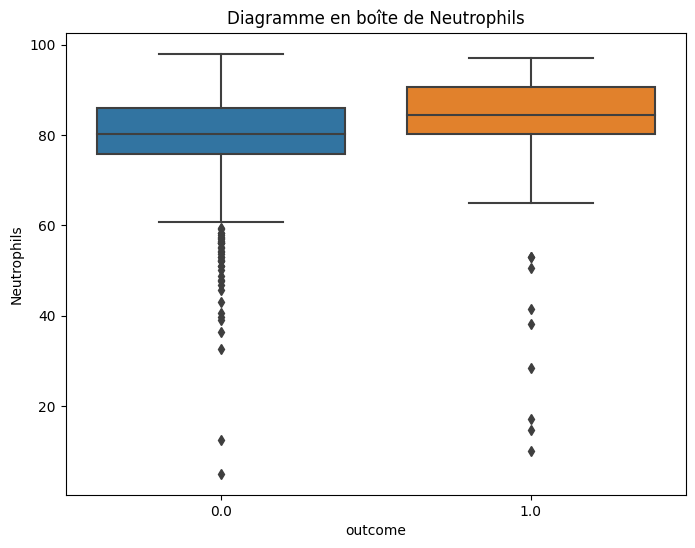

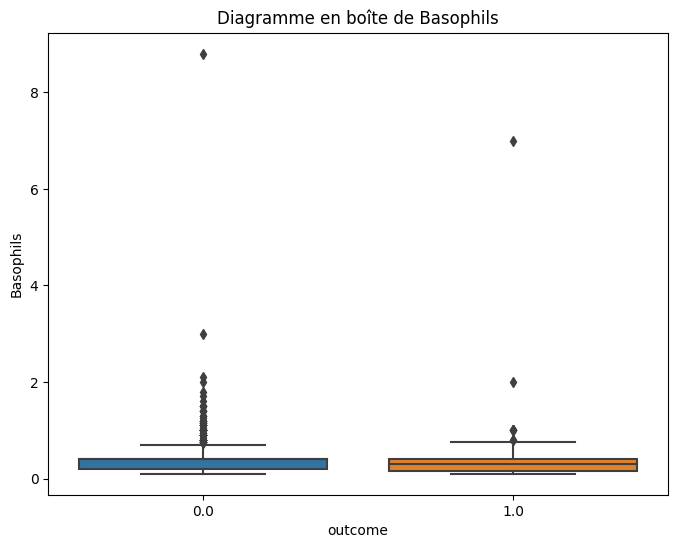

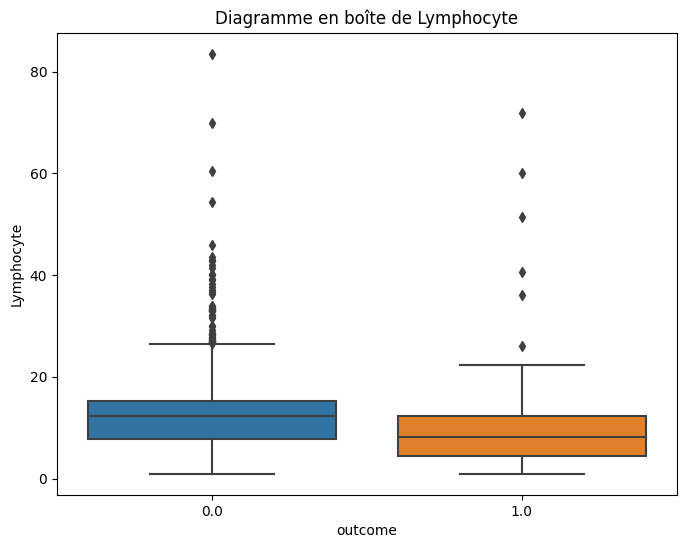

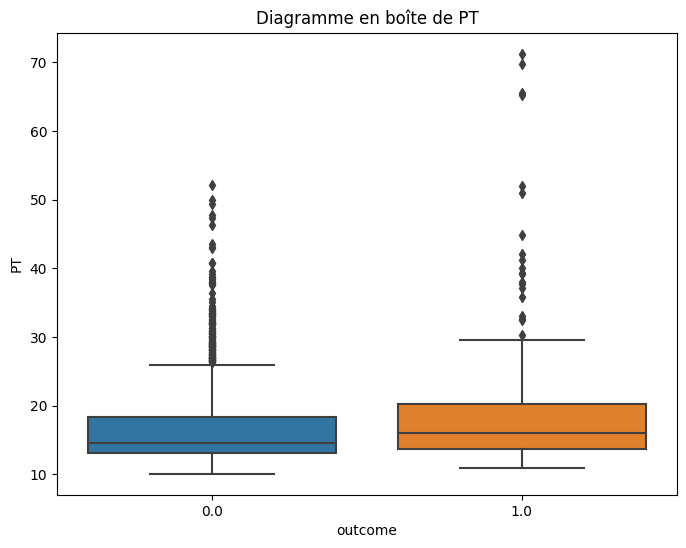

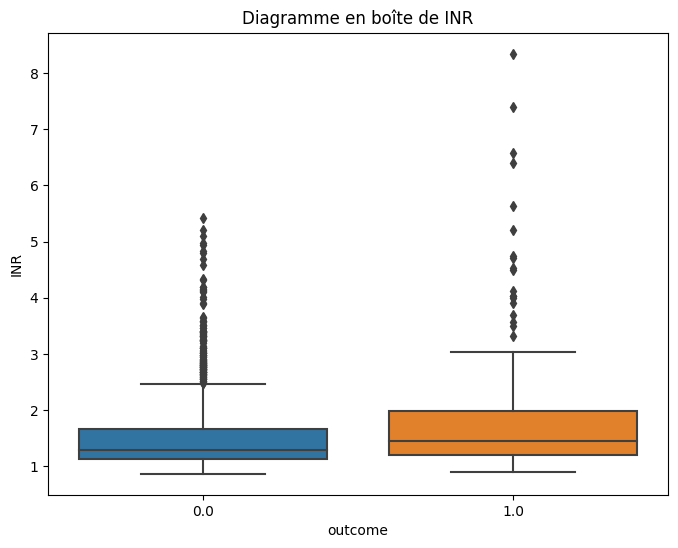

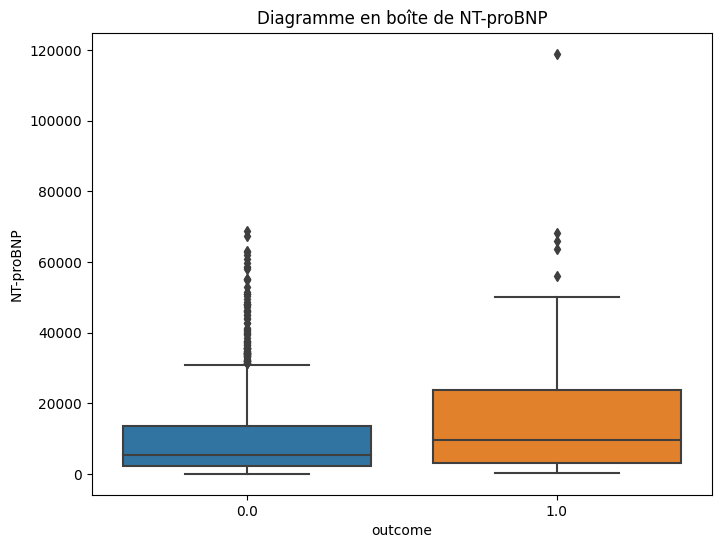

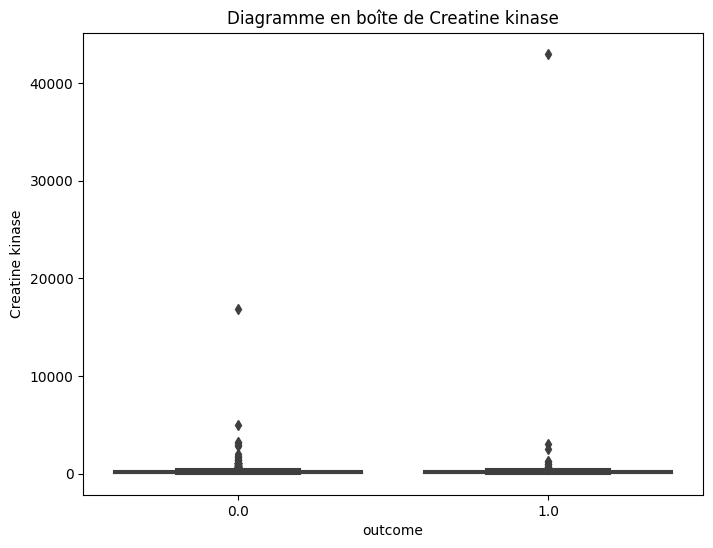

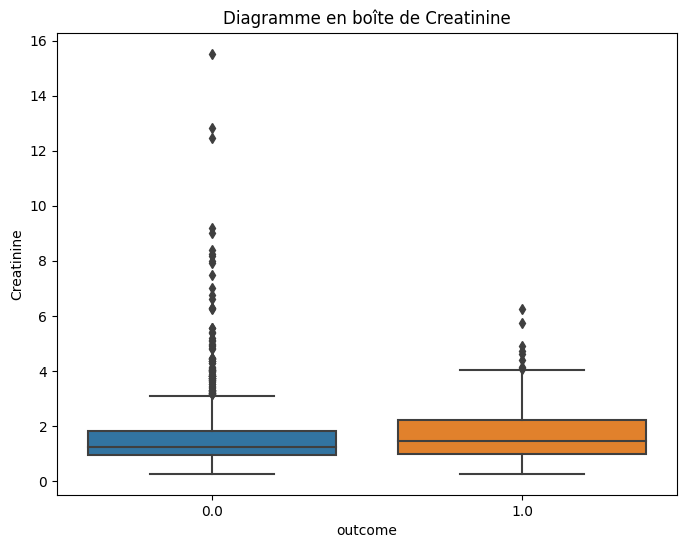

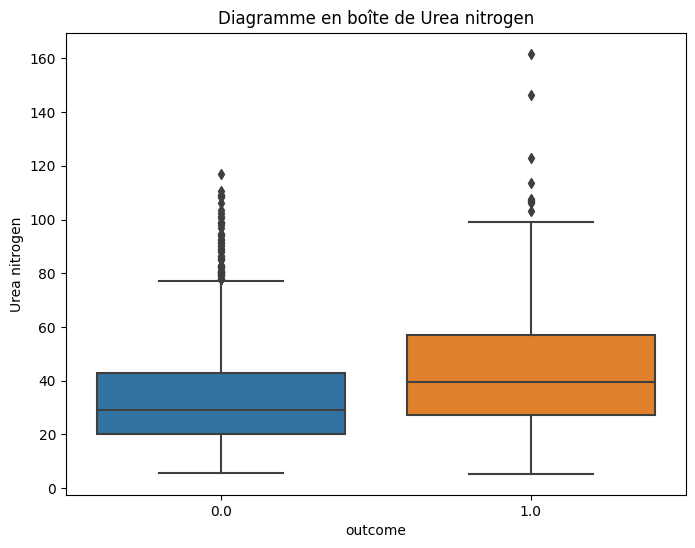

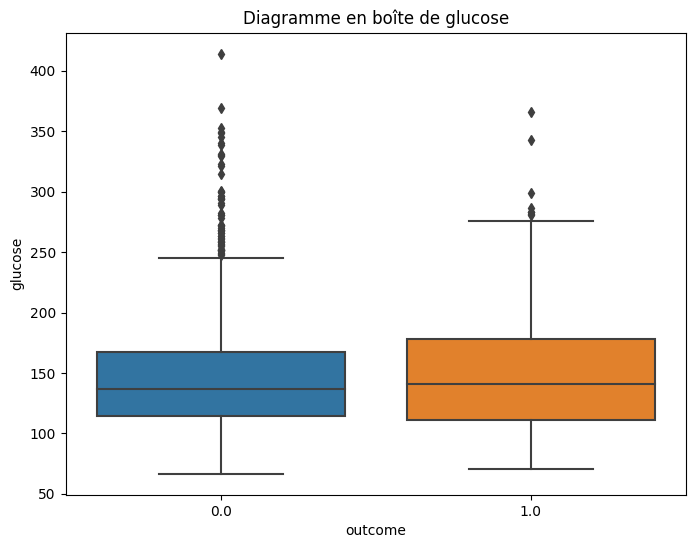

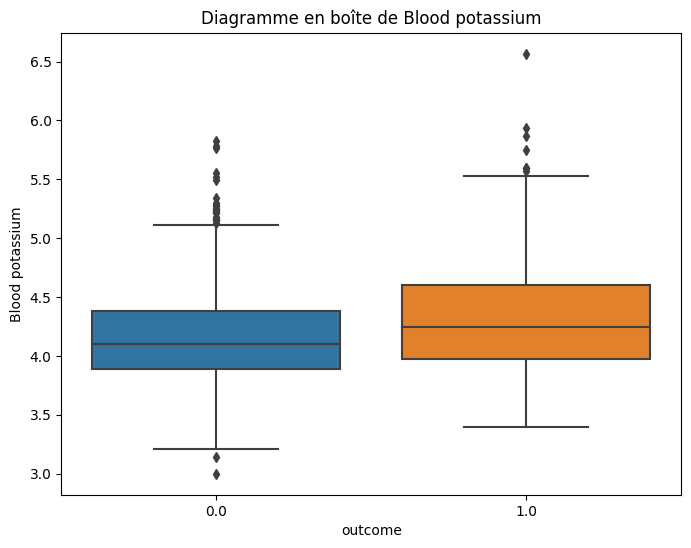

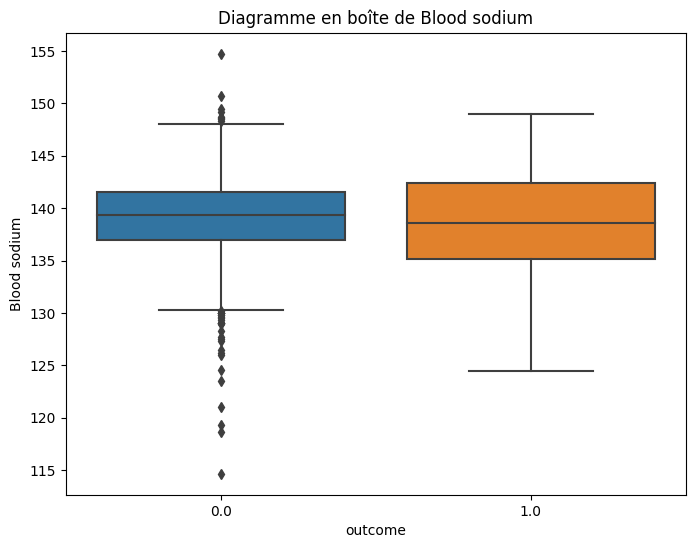

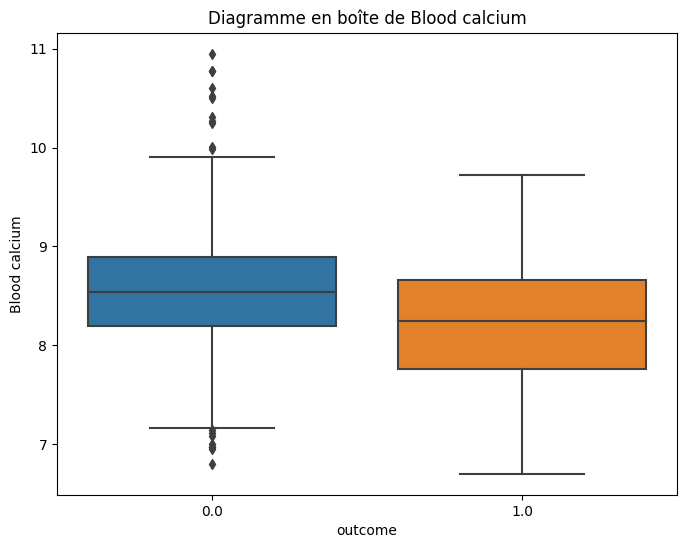

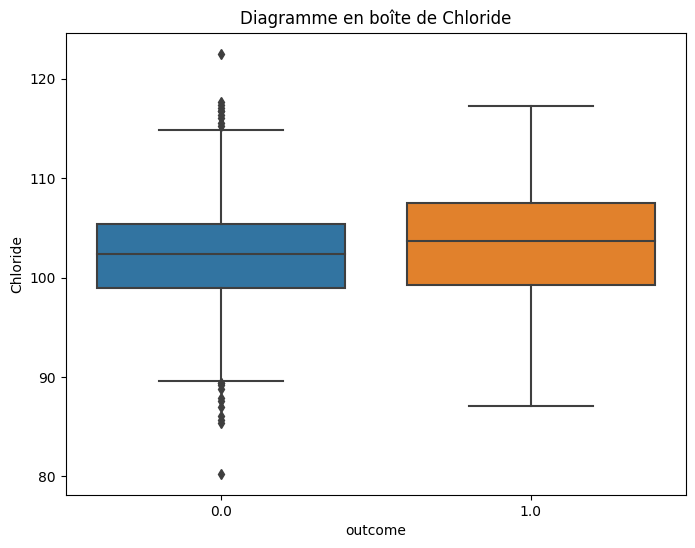

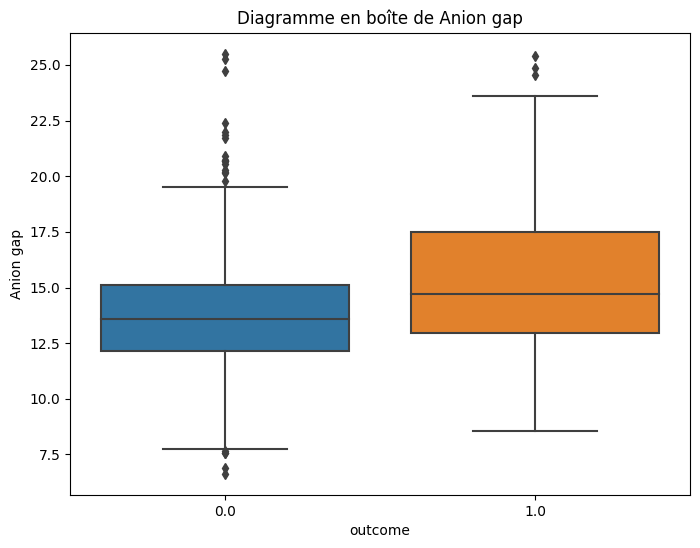

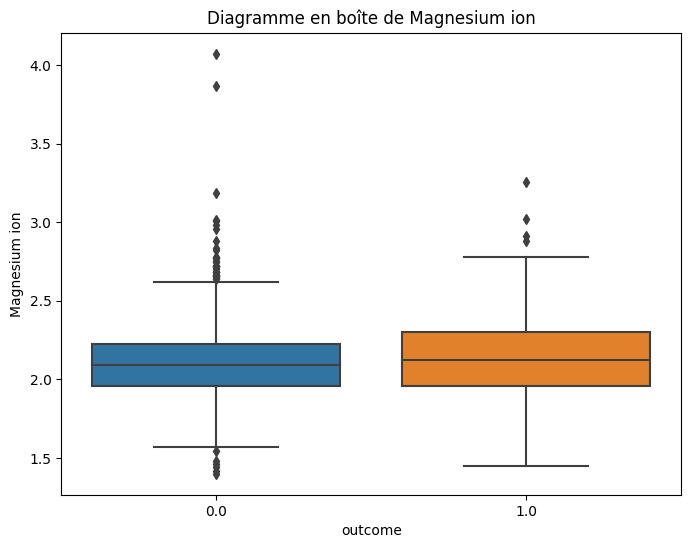

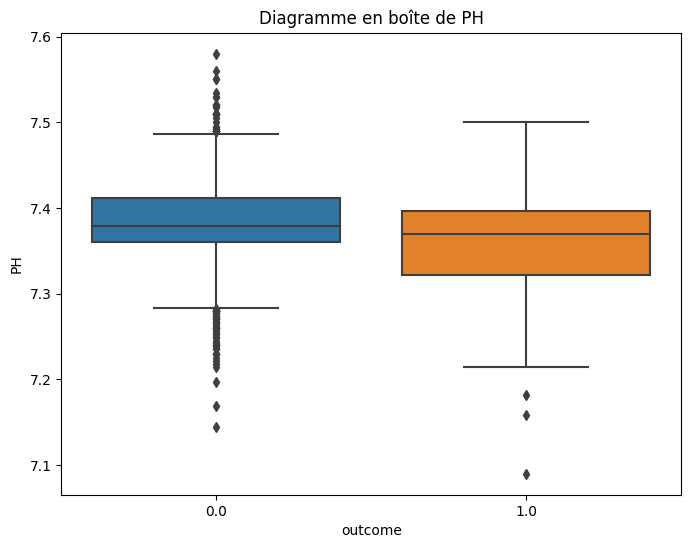

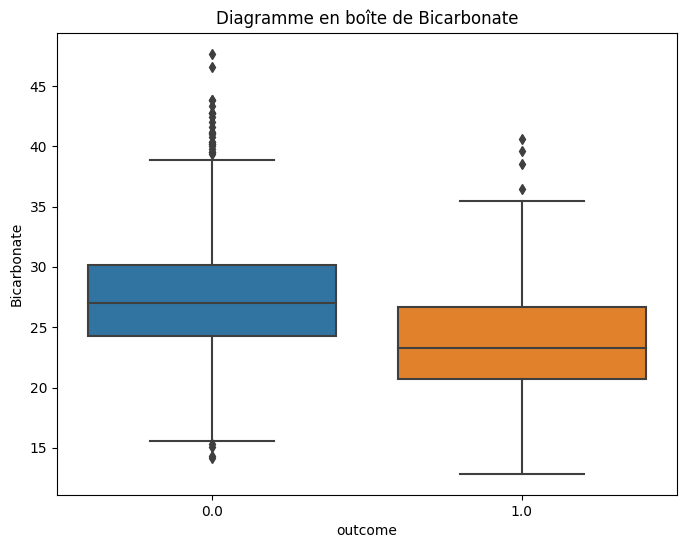

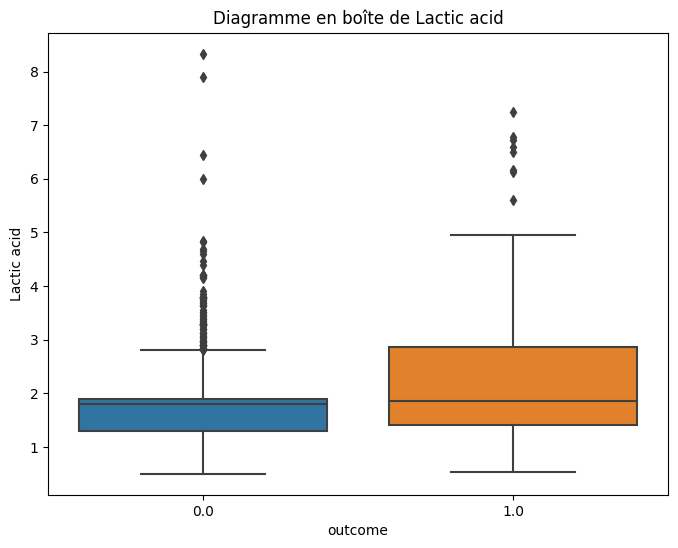

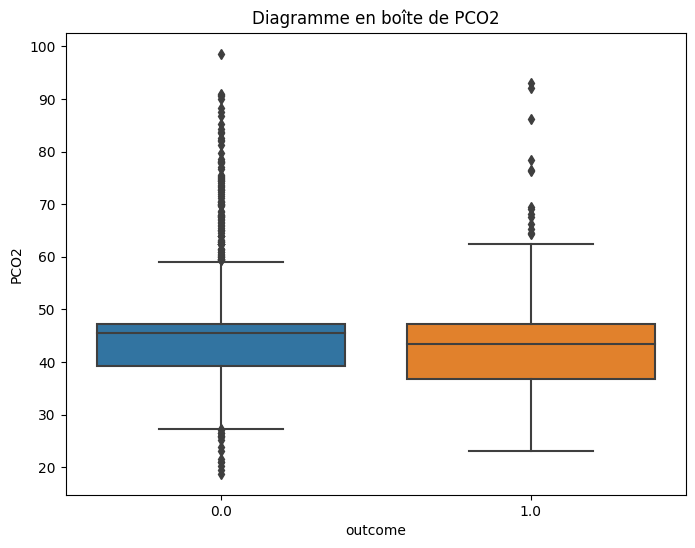

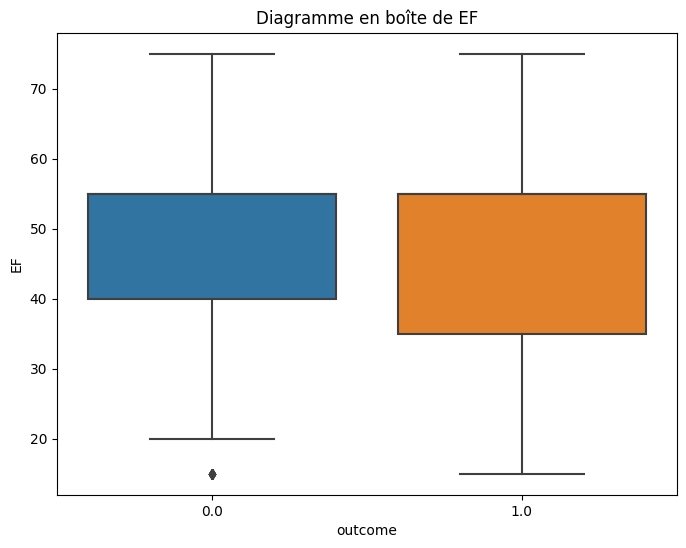

In [20]:
#Mise en évidence de la distribution des variables, les valeurs extrèmes, visualisation de la médiane, des quartiles, des valeurs abbérantes.
numeric_columns = df.select_dtypes(include=['float', 'int'])

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='outcome', y=column, data=df)
    plt.title(f'Diagramme en boîte de {column}')
    plt.show()

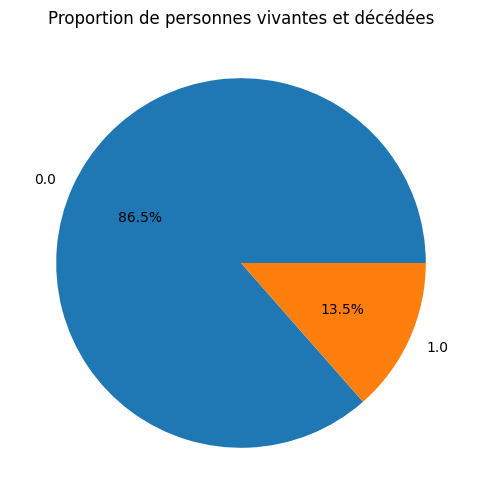

In [28]:
#Visualisation de la proportion de personnes vivantes et décédées
outcome_counts = df['outcome'].value_counts()
outcome_proportions = outcome_counts / outcome_counts.sum() * 100
plt.figure(figsize=(6, 6))
plt.pie(outcome_proportions, labels=outcome_proportions.index, autopct='%1.1f%%')
plt.title('Proportion de personnes vivantes et décédées')
plt.show()

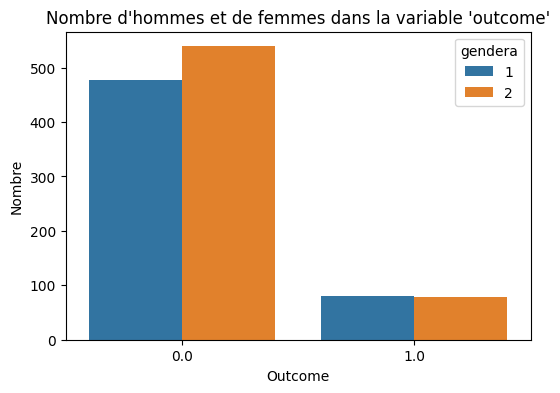

In [22]:
#Visualisation des genres dans la variable outcome(vivants/décédés):
plt.figure(figsize=(6, 4))
sns.countplot(x='outcome', hue='gendera', data=df)
plt.title('Nombre d\'hommes et de femmes dans la variable \'outcome\'')
plt.xlabel('Outcome')
plt.ylabel('Nombre')
plt.show()

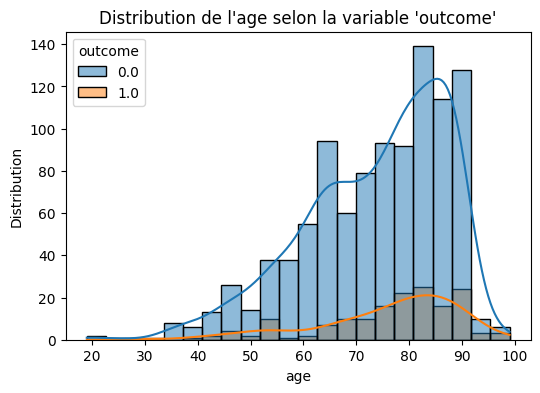

In [23]:
#Visualisation des âges dans la variable outcome
plt.figure(figsize=(6,4))
sns.histplot(x='age', hue='outcome', data=df, kde=True)
plt.title('Distribution de l\'age selon la variable \'outcome\'')
plt.xlabel('age')
plt.ylabel('Distribution')
plt.show()

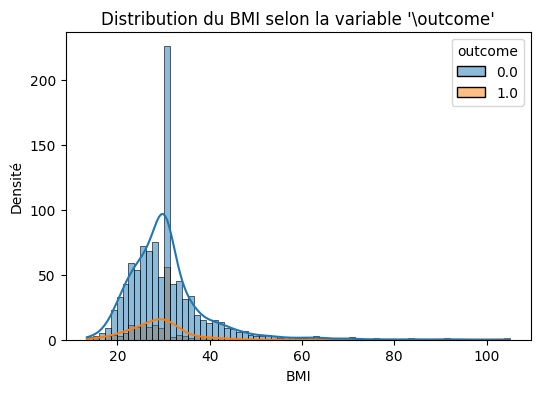

In [27]:
#Visualisation de l'indice de masse corporelle dans la variable outcome
plt.figure(figsize=(6,4))
sns.histplot(x="BMI",hue='outcome', data=df , fill=True, common_norm=False, kde=True)
plt.title("Distribution du BMI selon la variable '\outcome\'")
plt.xlabel('BMI')
plt.ylabel('Densité')
plt.show()

MODELISATIONS

In [29]:
#Librairies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [30]:
#Séparation features/target
target=df.outcome
X=df.drop(['outcome'], axis=1)

In [31]:
#Séparation des données :
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.2, random_state=42)

Modèle Regression Logistic

In [32]:
model=LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Affichage des métriques
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

0.8787234042553191
0.8389830508474576
Accuracy: 0.8389830508474576
Recall: 0.05
F1-Score: 0.09523809523809523
AUC-ROC: 0.525


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Le modèle identifie les personnes décédées que seulement dans 5% des cas . Le faible F1 score (équilibre entre précision et le rappel) indique que le modèle a des difficultés à atteindre un bon équilibre. La capacité de discrémination de ce modèle n'est pas meilleur qu'un modèle aléatoire.

In [33]:
!pip install scikit-plot

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

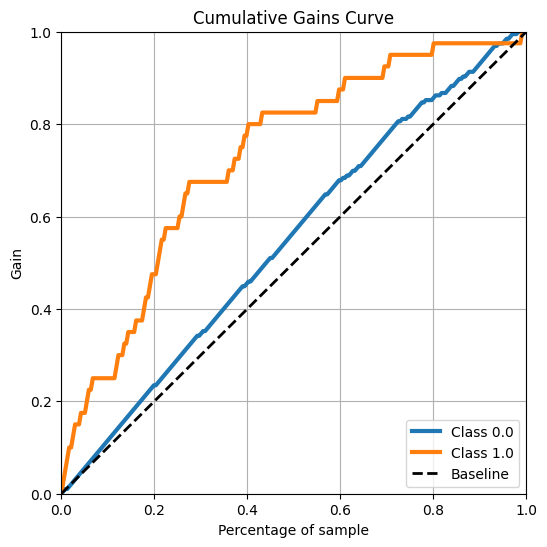

In [36]:
import scikitplot as skplt
y_probas=model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas, figsize=(6,6))

La création d'une courbe lift cumulée permet de visualiser l'efficacité du modèle dans la prédiction des résultats médicaux. Dans notre analyse, nous avons tracé la courbe de gain cumulative en distinguant les personnes vivantes et les personnes décédées.

Notre observation révèle que le modèle présente une meilleure capacité de prédiction pour les personnes vivantes par rapport aux personnes décédées. Toutefois, il est important de noter que le modèle surpasse significativement un classement aléatoire lorsqu'il s'agit de la prédiction des personnes décédées.

Cette conclusion souligne la performance relative du modèle dans la prédiction des résultats médicaux, en mettant en évidence sa capacité à identifier avec une précision supérieure les cas de survie.

Cependant nous continuons d'améliorer les prédictions de notre modèle en optimisant les paramètres.

In [37]:
#Normalisation des données
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [38]:
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2']}

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_sc, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_

# Évaluation du modèle avec les meilleurs hyperparamètres
y_pred = grid_search.predict(X_test_sc)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Affichage des résultats
print("Meilleurs hyperparamètres:", best_params)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Meilleurs hyperparamètres: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.8728813559322034
Recall: 0.325
F1-Score: 0.46428571428571436
AUC-ROC: 0.6548469387755101


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Nous avons clairement amélioré les performances du modèle dans sa capacité à identifier les cas positifs (personnes décédées) et à atteindre un meilleur équilibre entre la précision et le rappel.

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

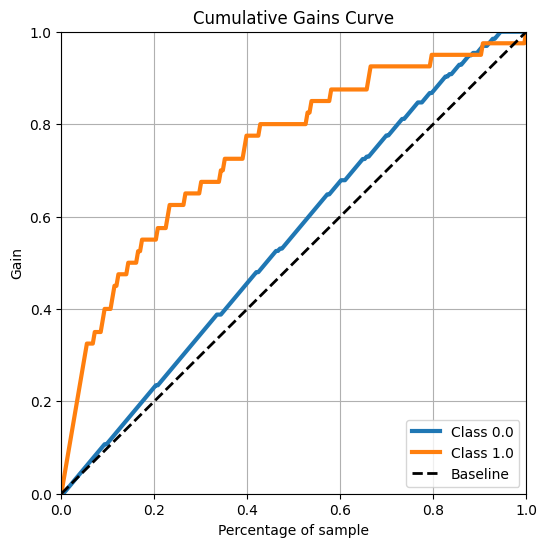

In [40]:
#Visualisation avec la courbe de gain :
y_proba=grid_search.predict_proba(X_test_sc)
skplt.metrics.plot_cumulative_gain(y_test, y_proba, figsize=(6,6))

Modèle Arbre de Décision

In [41]:
#Librairie
from sklearn.tree import DecisionTreeClassifier

In [42]:
model2=DecisionTreeClassifier()
model2.fit(X_train, y_train)
print(f'Accuracy données entrainement: {model2.score(X_train, y_train)}')
y_pred=model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Affichage des métriques
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy données entrainement: 1.0
Accuracy: 0.8135593220338984
Recall: 0.325
F1-Score: 0.37142857142857144
AUC-ROC: 0.6191326530612244


Premiers resultats : laissent supposer un overfitting sur les données d'entrainements. Le modèle prédit correctement la classe cible dans 77% des cas sur les nouvelles données. Dans 32% des cas le modèle prédit correctement les personnes décédées. Le modède a du mal a attendre le bon équilibre entre la précision et le rappel. Pour l'AUC-ROC : Un score de 0.5 indique que le modèle a une capacité de discrimination prédictive équivalente à un modèle aléatoire. Un score supérieur à 0.5 indique une certaine capacité de discrimination, mais il y a encore de la place pour améliorer la performance prédictive.  Tentons d'optimiser les hyperparamètres de mon modèle.

In [43]:
#Normalisation des données
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)
param_grid = {'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaler, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_

# Évaluation du modèle avec les meilleurs hyperparamètres
y_pred = grid_search.predict(X_test_scaler)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Affichage des résultats
print("Meilleurs hyperparamètres:", best_params)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Meilleurs hyperparamètres: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy: 0.7923728813559322
Recall: 0.3
F1-Score: 0.32876712328767127
AUC-ROC: 0.5964285714285715


Nous avons légèrement améliorer les performances du modèle. Poursuivons vers d'autres modèles.

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

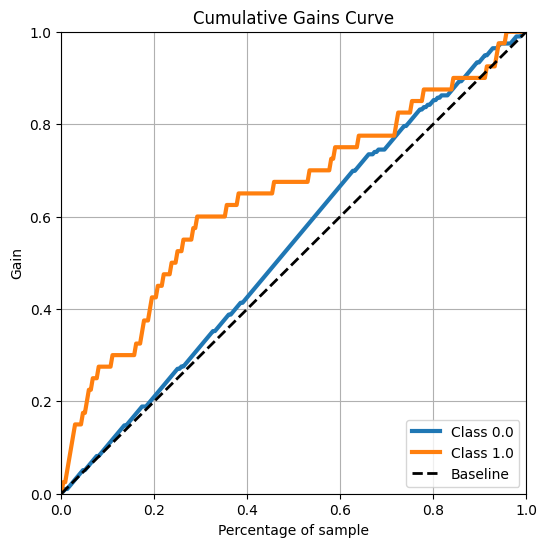

In [44]:
#Que donne la courbe de gain après optimisation des paramètres ?
y_prob=grid_search.predict_proba(X_test_scaler)
skplt.metrics.plot_cumulative_gain(y_test, y_prob, figsize=(6,6))

Random Forest

In [45]:
#Librairie :
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
print(f'Accuracy données entrainement: {rf.score(X_train, y_train)}')
y_pred=rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Affichage des métriques
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy données entrainement: 1.0
Accuracy: 0.8516949152542372
Recall: 0.15
F1-Score: 0.2553191489361702
AUC-ROC: 0.5724489795918367


Le modèle prédit correctement la classe cible dans 83% des cas sur les nouvelles données. Dans 7,5% des cas le modèle prédit correctement les personnes décédées. Le modède a du mal a attendre le bon équilibre entre la précision et le rappel. Pour l'AUC-ROC : Un score de 0.5 indique que le modèle a une capacité de discrimination prédictive équivalente à un modèle aléatoire.Tentons d'améliorer les performances de ce modèle

In [47]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_

# Évaluation du modèle avec les meilleurs hyperparamètres
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Affichage des résultats
print("Meilleurs hyperparamètres:", best_params)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Meilleurs hyperparamètres: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.8516949152542372
Recall: 0.125
F1-Score: 0.2222222222222222
AUC-ROC: 0.5625


<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

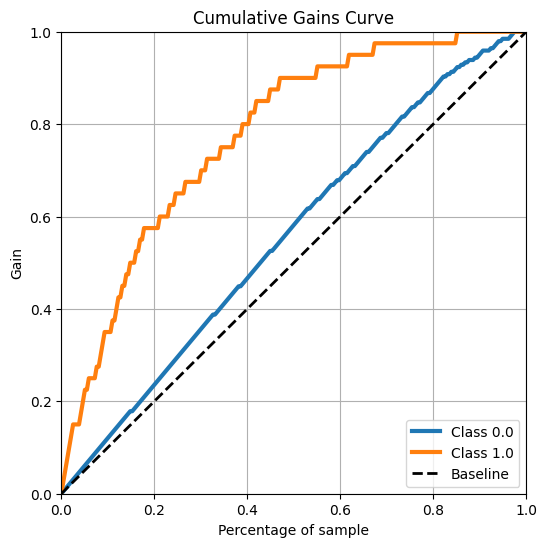

In [48]:
#Courbe de gain
y_probab=grid_search.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probab, figsize=(6,6))

Nous avons légèrement améliorer les performances du modèle.

Gradient boosting : Adaboost, xgboost, Lightgbm et catboost

ADABOOSTCLASSIFIER

In [49]:
#librairie:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
ac=AdaBoostClassifier(base_estimator=model2, n_estimators=400)
ac.fit(X_train, y_train)
print(f'Accuracy données entrainement: {ac.score(X_train, y_train)}')
y_pred=ac.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Affichage des métriques
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy données entrainement: 1.0
Accuracy: 0.788135593220339
Recall: 0.325
F1-Score: 0.34210526315789475
AUC-ROC: 0.6038265306122449


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Optimisation des paramètres pour tenter d'améliorer les performances du modèle:

In [51]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}
grid_search = GridSearchCV(estimator=ac, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_

# Évaluation du modèle avec les meilleurs hyperparamètres
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Affichage des résultats
print("Meilleurs hyperparamètres:", best_params)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Meilleurs hyperparamètres: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.788135593220339
Recall: 0.375
F1-Score: 0.375
AUC-ROC: 0.6237244897959184


L'optimisation des paramètres n'a pas amélioré les performances du modèle.

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

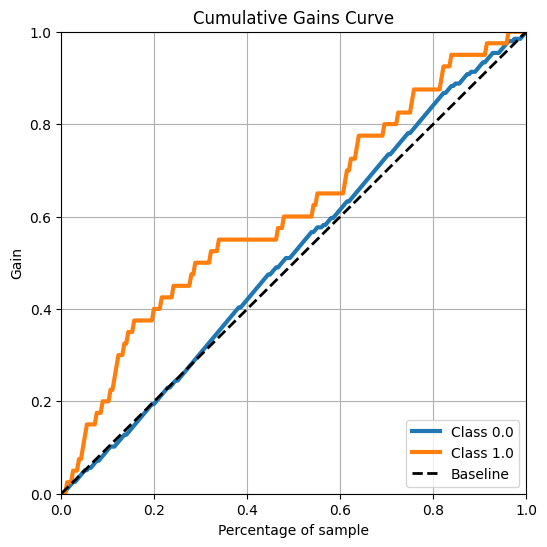

In [52]:
#Courbe de gain
y_pro=grid_search.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_pro, figsize=(6,6))

XGBOOST

In [53]:
#Librairie:
from xgboost import XGBClassifier

In [54]:
#hyperparamètre à explorer
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Créer une instance de XGBClassifier
XGB= XGBClassifier()

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_

# Évaluation du modèle avec les meilleurs hyperparamètres
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Affichage des résultats
print("Meilleurs hyperparamètres:", best_params)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Meilleurs hyperparamètres: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Accuracy: 0.8559322033898306
Recall: 0.225
F1-Score: 0.3461538461538462
AUC-ROC: 0.6048469387755102


<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

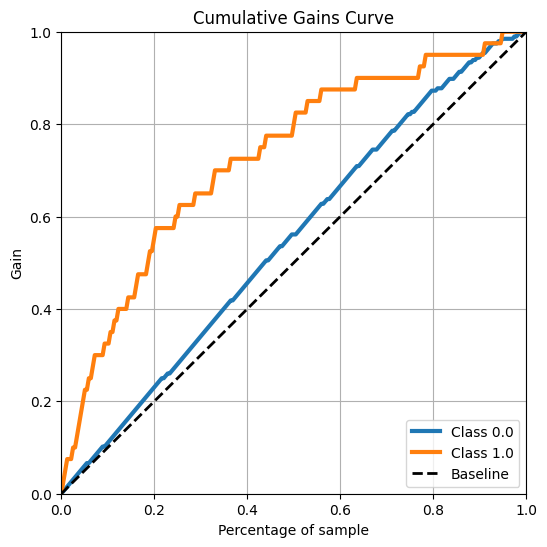

In [55]:
#Courbe de gain
y_pro2=grid_search.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_pro2, figsize=(6,6))

LIGHTGBM

In [56]:
#Librairie:
from lightgbm import LGBMClassifier

In [57]:
# hyperparamètres à explorer
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Créer une instance de LGBMClassifier
model = LGBMClassifier()

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_

# Évaluation du modèle avec les meilleurs hyperparamètres
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Affichage des résultats
print("Meilleurs hyperparamètres:", best_params)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Meilleurs hyperparamètres: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.8432203389830508
Recall: 0.125
F1-Score: 0.2127659574468085
AUC-ROC: 0.5573979591836734


<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

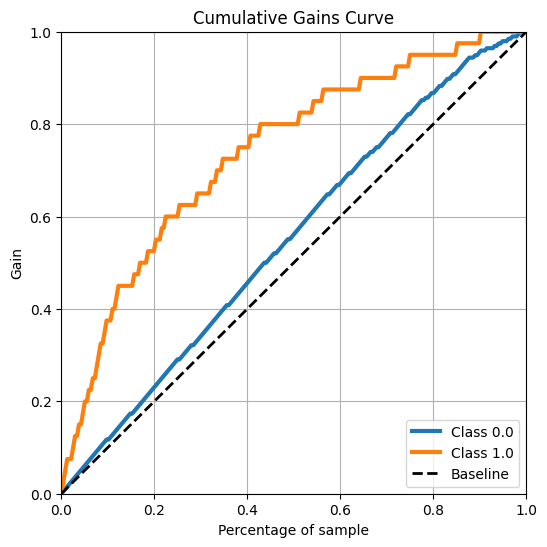

In [58]:
#Courbe de gain
y_pro3=grid_search.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_pro3, figsize=(6,6))

CATBOOST

In [59]:
#Librairie:
!pip install catboost
from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.2 MB/s eta 0:00:00


In [60]:
# hyperparamètres à explorer
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Créer une instance de CatBoostClassifier
catB = CatBoostClassifier()

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=catB, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_

# Évaluation du modèle avec les meilleurs hyperparamètres
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Affichage des résultats
print("Meilleurs hyperparamètres:", best_params)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
5:	learn: 0.6880506	total: 37.5ms	remaining: 1.21s
6:	learn: 0.6872396	total: 43.5ms	remaining: 1.2s
7:	learn: 0.6864014	total: 54.6ms	remaining: 1.31s
8:	learn: 0.6856143	total: 64.2ms	remaining: 1.36s
9:	learn: 0.6847380	total: 72ms	remaining: 1.37s
10:	learn: 0.6839236	total: 86.6ms	remaining: 1.49s
11:	learn: 0.6830573	total: 102ms	remaining: 1.6s
12:	learn: 0.6822442	total: 112ms	remaining: 1.6s
13:	learn: 0.6814368	total: 117ms	remaining: 1.56s
14:	learn: 0.6805554	total: 124ms	remaining: 1.52s
15:	learn: 0.6796249	total: 130ms	remaining: 1.49s
16:	learn: 0.6787359	total: 136ms	remaining: 1.46s
17:	learn: 0.6779258	total: 142ms	remaining: 1.44s
18:	learn: 0.6769806	total: 148ms	remaining: 1.41s
19:	learn: 0.6760460	total: 154ms	remaining: 1.39s
20:	learn: 0.6752322	total: 160ms	remaining: 1.36s
21:	learn: 0.6744996	total: 166ms	remaining: 1.34s
22:	learn: 0.6736459	total: 172ms	remaining: 1.32s
23:	lear

In [ ]:
#Courbe de gain
y_pro4=grid_search.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_pro4, figsize=(6,6))

Quels modèles donnent les meilleurs performances ?
| Modèle             | Accuracy  | Recall  | F1-Score  | AUC-ROC  |
|--------------------|-----------|---------|-----------|----------|
| Modèle LR          | 0.83      | 0.05    | 0.09      | 0.52     |
| Modèle LRBESTPAR   | 0.87      | 0.32    | 0.46      | 0.65     |
| Modèle DT          | 0.81      | 0.32    | 0.37      | 0.61     |
| Modèle DTBESTPAR   | 0.79      | 0.3     | 0.32      | 0.59     |
| Modèle RF          | 0.85      | 0.15    | 0.25      | 0.57     |
| Modèle RFBESTPAR   | 0.85      | 0.12    | 0.22      | 0.56     |
| Modèle ADABOOST    | 0.78      | 0.32    | 0.34      | 0.60     |
| Modèle ADABESTPAR  | 0.78      | 0.37    | 0.37      | 0.62     |
| Modèle XGBBESTPAR  | 0.85      | 0.22    | 0.34      | 0.60     |
| Modèle LIGHTBP     | 0.84      | 0.12    | 0.21      | 0.55     |
| Modèle CATBPAR     | 0.87      | 0.27    | 0.42      | 0.63     |


Conclusion :  
certains modèles semblent se démarquer légèrement et pourraient être considérés comme prometteurs:

    -Modèle de Régression logistique avec meilleurs hyperparamètres présente de bons scores d'accuracy, de recall, de F1-score et d'AUC-ROC.

    Modèle CatBoost avec meilleurs hyperparamètres a également de bonnes performances dans toutes les métriques.
Il serait important de prendre en compte d'autres facteurs tels que la stabilité des performances (tests de validation croisée), complexité du modèle(modèle plus simple est plus facile à interpréter) et le contexte spécifique du modèle(exigences du domaine d'applicition, du caractère unique du problème...).
Il serait intéressantd'approfondir l'analyse en examinant d'autres aspects des modèles, tels que leur capacité à généraliser, leur robustesse face à de nouveaux échantillons de données et leur interprétabilité.